In [1]:

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, Trials
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Data mining

In [3]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('/content/drive/MyDrive/Green belt/proceso_parte2.csv')
ot = pd.read_csv('/content/drive/MyDrive/Green belt/OT.csv', sep=';')

In [4]:
ot['Fecha fin extrema'] = pd.to_datetime(ot['Fecha fin extrema'])

<ipython-input-4-1735e6a7822b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ot['Fecha fin extrema'] = pd.to_datetime(ot['Fecha fin extrema'])


In [5]:
ot['Tarea'].unique()

array(['Tareas_quemador', 'Intervencion_brocal', 'Fumisteria',
       'Reparacion_Chimenea', 'Reparacion_puerta'], dtype=object)

In [6]:
ot_2011=ot[ot['CC']==2011]
ot_2021=ot[ot['CC']==2021]


In [7]:
Tareas_quemador_2011 = ot_2011[ot_2011['Tarea']=='Tareas_quemador']['Fecha fin extrema'].tolist()
Tareas_Intervencion_brocal_2011 = ot_2011[ot_2011['Tarea']=='Intervencion_brocal']['Fecha fin extrema'].tolist()
Tareas_Reparacion_Chimenea_2011 = ot_2011[ot_2011['Tarea']=='Reparacion_Chimenea']['Fecha fin extrema'].tolist()
Tareas_Reparacion_puerta_2011 = ot_2011[ot_2011['Tarea']=='Reparacion_puerta']['Fecha fin extrema'].tolist()
Tareas_Fumisteria_2011 = ot_2011[ot_2011['Tarea']=='Fumisteria']['Fecha fin extrema'].tolist()

In [8]:
Tareas_quemador_2021 = ot_2021[ot_2021['Tarea']=='Tareas_quemador']['Fecha fin extrema'].tolist()
Tareas_Intervencion_brocal_2021 = ot_2021[ot_2021['Tarea']=='Intervencion_brocal']['Fecha fin extrema'].tolist()
Tareas_Reparacion_Chimenea_2021 = ot_2021[ot_2021['Tarea']=='Reparacion_Chimenea']['Fecha fin extrema'].tolist()
Tareas_Reparacion_puerta_2021 = ot_2021[ot_2021['Tarea']=='Reparacion_puerta']['Fecha fin extrema'].tolist()
Tareas_Fumisteria_2021 = ot_2021[ot_2021['Tarea']=='Fumisteria']['Fecha fin extrema'].tolist()

In [9]:
data['Fecha_Desde'] = pd.to_datetime(data['Fecha_Desde'])
data['Fecha_Hasta'] = pd.to_datetime(data['Fecha_Hasta'])

In [10]:
Tareas_quemador_2011

[Timestamp('2023-02-05 00:00:00'),
 Timestamp('2023-01-28 00:00:00'),
 Timestamp('2022-05-20 00:00:00'),
 Timestamp('2021-12-24 00:00:00'),
 Timestamp('2021-08-25 00:00:00'),
 Timestamp('2021-05-06 00:00:00'),
 Timestamp('2021-07-04 00:00:00'),
 Timestamp('2021-03-22 00:00:00')]

In [11]:
data.shape

(3116, 55)

In [12]:
data_2011=data[data['CC']==2011]
data_2021=data[data['CC']==2021]
data_2021 = data_2021.reset_index()
data_2011 = data_2011.reset_index()

In [13]:
data_2011.shape

(1424, 56)

In [14]:
data_2011.loc[:,'Fecha_Hasta_1'] = pd.to_numeric(data_2011['Fecha_Hasta'])
Tareas_quemador_2011 = pd.to_datetime(Tareas_quemador_2011)
Tareas_quemador_2011 = pd.to_numeric(Tareas_quemador_2011)
Tareas_Intervencion_brocal_2011 = pd.to_datetime(Tareas_Intervencion_brocal_2011)
Tareas_Intervencion_brocal_2011 = pd.to_numeric(Tareas_Intervencion_brocal_2011)
Tareas_Reparacion_Chimenea_2011  = pd.to_datetime(Tareas_Reparacion_Chimenea_2011 )
Tareas_Reparacion_Chimenea_2011 = pd.to_numeric(Tareas_Reparacion_Chimenea_2011)
Tareas_Reparacion_puerta_2011  = pd.to_datetime(Tareas_Reparacion_puerta_2011)
Tareas_Reparacion_puerta_2011= pd.to_numeric(Tareas_Reparacion_puerta_2011)
Tareas_Fumisteria_2011  = pd.to_datetime(Tareas_Fumisteria_2011)
Tareas_Fumisteria_2011= pd.to_numeric(Tareas_Fumisteria_2011)

In [15]:
data_2021.loc[:,'Fecha_Hasta_1'] = pd.to_numeric(data_2021['Fecha_Hasta'])
Tareas_quemador_2021 = pd.to_datetime(Tareas_quemador_2021)
Tareas_quemador_2021 = pd.to_numeric(Tareas_quemador_2021)
Tareas_Intervencion_brocal_2021 = pd.to_datetime(Tareas_Intervencion_brocal_2021)
Tareas_Intervencion_brocal_2021 = pd.to_numeric(Tareas_Intervencion_brocal_2021)
Tareas_Reparacion_Chimenea_2021  = pd.to_datetime(Tareas_Reparacion_Chimenea_2021 )
Tareas_Reparacion_Chimenea_2021 = pd.to_numeric(Tareas_Reparacion_Chimenea_2021)
Tareas_Reparacion_puerta_2021  = pd.to_datetime(Tareas_Reparacion_puerta_2021)
Tareas_Reparacion_puerta_2021= pd.to_numeric(Tareas_Reparacion_puerta_2021)
Tareas_Fumisteria_2021  = pd.to_datetime(Tareas_Fumisteria_2021)
Tareas_Fumisteria_2021= pd.to_numeric(Tareas_Fumisteria_2021)


In [16]:
def despues_parada(Tarea,data,nombre_columna):
    data.loc[:, nombre_columna] = 'No'

# Recorrer cada valor de la lista
    for numero in Tarea:
    # Calcular la diferencia absoluta entre el número y los valores de la columna
        diferencias = np.abs(data['Fecha_Hasta_1'] - numero)
    # Obtener el índice del valor mínimo de las diferencias
        indice_minimo = np.argmin(diferencias)
    # Marcar el valor más cercano con "Si" en la columna nueva
        data.loc[indice_minimo, nombre_columna] = 'Si'
    return

In [17]:
despues_parada(Tareas_quemador_2011,data_2011,'Tareas_quemador')
despues_parada(Tareas_quemador_2021,data_2021,'Tareas_quemador')
despues_parada(Tareas_Intervencion_brocal_2011,data_2011,'Tareas_Intervencion_brocal')
despues_parada(Tareas_Intervencion_brocal_2021,data_2021,'Tareas_Intervencion_brocal')
despues_parada(Tareas_Reparacion_Chimenea_2011,data_2011,'Tareas_Reparacion_Chimenea')
despues_parada(Tareas_Reparacion_Chimenea_2021,data_2021,'Tareas_Reparacion_Chimenea')
despues_parada(Tareas_Reparacion_puerta_2011,data_2011,'Tareas_Reparacion_puerta')
despues_parada(Tareas_Reparacion_puerta_2021,data_2021,'Tareas_Reparacion_puerta')
despues_parada(Tareas_Fumisteria_2011,data_2011,'Tareas_Fumisteria')
despues_parada(Tareas_Fumisteria_2021,data_2021,'Tareas_Fumisteria')


In [18]:
def N_tarea(Tarea,data):
  # Inicializar la columna numérica
    numerica = 0

    # Actualizar la columna numérica
    for i, row in data.iterrows():
        if row[Tarea] == 'Si':
            numerica = 0
        data.loc[i, ('N_'+Tarea)] = numerica
        numerica += 1


In [19]:
N_tarea('Tareas_quemador',data_2011)
N_tarea('Tareas_quemador',data_2021)
N_tarea('Tareas_Intervencion_brocal',data_2011)
N_tarea('Tareas_Intervencion_brocal',data_2021)
N_tarea('Tareas_Reparacion_Chimenea',data_2011)
N_tarea('Tareas_Reparacion_Chimenea',data_2021)
N_tarea('Tareas_Reparacion_puerta',data_2011)
N_tarea('Tareas_Reparacion_puerta',data_2021)
N_tarea('Tareas_Fumisteria',data_2011)
N_tarea('Tareas_Fumisteria',data_2021)

In [20]:
data_2011.shape

(1424, 67)

In [21]:
data = pd.concat([data_2011,data_2021])

In [22]:
data

index  Lanzamiento  PROCESO_ID    CC         Fecha_Desde  \
0         0         5127     8921963  2011 2021-04-01 06:34:48   
1         1         5128     8923350  2011 2021-04-01 09:47:55   
2         2         5129     8923352  2011 2021-04-01 13:20:29   
3         3         5129     8923352  2011 2021-04-01 13:20:29   
4         4         5130     8924229  2011 2021-04-01 17:25:00   
...     ...          ...         ...   ...                 ...   
1687   3111        55553     9592525  2021 2023-03-31 05:33:44   
1688   3112        55554     9592842  2021 2023-03-31 09:00:18   
1689   3113        55555     9592843  2021 2023-03-31 12:39:51   
1690   3114        55556     9592844  2021 2023-03-31 16:42:10   
1691   3115        55557     9592845  2021 2023-03-31 20:22:14   

             Fecha_Hasta  NUMERO_OF          duracion  Paradas [cant]  \
0    2021-04-01 09:47:55      80555  3,21861111111111               4   
1    2021-04-01 13:20:29      80557  3,54277777777778               7   
2    2021-04-01 17:25:00      80559  4,07527777777778               1   
3    2021-04-01 17:25:00      80559  4,07527777777778               1   
4    2021-04-01 20:46:47      80560  3,36305555555556               2   
...                  ...        ...               ...             ...   
1687 2023-03-31 09:00:18      84239  3,44277777777778               6   
1688 2023-03-31 12:39:51      84244  3,65916666666667               4   
1689 2023-03-31 16:42:10      84245  4,03861111111111               6   
1690 2023-03-31 20:22:14      84246  3,66777777777778               6   
1691 2023-03-31 23:00:17      84247  2,63416666666667               5   

        Of Id  ...  Tareas_quemador  Tareas_Intervencion_brocal  \
0     1281923  ...               Si                          Si   
1     1282058  ...               No                          No   
2     1282060  ...               No                          No   
3     1282060  ...               No                          No   
4     1282069  ...               No                          No   
...       ...  ...              ...                         ...   
1687  1359828  ...               No                          No   
1688  1360030  ...               No                          No   
1689  1360031  ...               No                          No   
1690  1360032  ...               No                          No   
1691  1360033  ...               Si                          Si   

      Tareas_Reparacion_Chimenea Tareas_Reparacion_puerta  Tareas_Fumisteria  \
0                             No                       No                 No   
1                             No                       No                 No   
2                             No                       No                 No   
3                             No                       No                 No   
4                             No                       No                 No   
...                          ...                      ...                ...   
1687                          No                       No                 No   
1688                          No                       No                 No   
1689                          No                       No                 No   
1690                          No                       No                 No   
1691                          Si                       No                 Si   

     N_Tareas_quemador N_Tareas_Intervencion_brocal  \
0                  0.0                          0.0   
1                  1.0                          1.0   
2                  2.0                          2.0   
3                  3.0                          3.0   
4                  4.0                          4.0   
...                ...                          ...   
1687             663.0                        179.0   
1688             664.0                        180.0   
1689             665.0                        181.0   
1690             666

In [23]:
# Obtener el mes
data['mes'] = data['Fecha_Hasta'].dt.month

# Obtener la semana del año
data['semana'] = data['Fecha_Hasta'].dt.week

# Obtener el día de la semana (0: lunes, 1: martes, ..., 6: domingo)
data['dia_semana'] = data['Fecha_Hasta'].dt.dayofweek

# Obtener el día del mes
data['dia_mes'] = data['Fecha_Hasta'].dt.day

<ipython-input-23-2220bf159a6a>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['semana'] = data['Fecha_Hasta'].dt.week


In [24]:
categorias = data['Turno'].unique()
categorias


array(['N-M', 'M', 'M-T', 'T', 'N', 'T-N', 'M-N', 'T-T', 'M-T-T', 'T-T-T',
       'T-M', 'N-T', 'T-T-N', 'M-M', 'M-M-T-T', 'M-M-T', 'T-N-N',
       'T-T-N-N', 'N-N', 'N-N-M-M', 'M-M-M-M'], dtype=object)

In [25]:
data['Turno'] = data['Turno'].replace('T-T', 'T')
data['Turno'] = data['Turno'].replace('M-T-T', 'M-T')
data['Turno'] = data['Turno'].replace('T-T-T', 'T')
data['Turno'] = data['Turno'].replace('T-T-N-N', 'T-N')
data['Turno'] = data['Turno'].replace('N-N', 'N')
data['Turno'] = data['Turno'].replace('N-N-M-M', 'N-M')
data['Turno'] = data['Turno'].replace('M-M-M-M', 'M')
data['Turno'] = data['Turno'].replace('T-T-N', 'T-N')
data['Turno'] = data['Turno'].replace('M-M-T-T', 'M-T')
data['Turno'] = data['Turno'].replace('T-N-N', 'T-N')
data['Turno'] = data['Turno'].replace('M-M-T', 'M-T')
data['Turno'] = data['Turno'].replace('M-M', 'M')

# Analisis estadistico

In [26]:
numeric_columns = ["RG", "N_lingote", "N_aleantes", "N_RG", "N_RI", "N_RF", "Kg"]
for col in numeric_columns:
    data[col] = data[col].str.replace(',', '.').astype(float)

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col])


data["N_aleantes"] = data["N_aleantes"].round(2)
data["N_RG"] = data["N_RG"].round(2)
data["N_RI"] = data["N_RI"].round(2)
data["N_RF"] = data["N_RF"].round(2)
data["N_lingote"] = data["N_lingote"].round(2)

# Convertir la columna a tipo numérico
data['Kg']= pd.to_numeric(data['Kg'], errors='coerce')

# Redondear la columna a una cifra decimal
data['Tn'] = data['Kg'].round(1)
data['Tn'] = data['Tn'] / 1000
variables_num = ["Tn", "N_lingote", "N_aleantes",
                   "N_RG", "N_RI", "N_RF", "Total", "P_Prog_6X", "P_Programada", "P_manteniento", "P_proceso",
                   "P_productiva", "tiempo", "t_quemadores", "tiempo_neto", "Tiempo_productivo",
                   'N_Tareas_Fumisteria', 'N_Tareas_Reparacion_puerta', 'N_Tareas_Reparacion_Chimenea', 'N_Tareas_Intervencion_brocal', 'N_Tareas_quemador',
                 "Max_Valor_Baño", "Max_Valor_boveda" ]

variables_categoricas = ["Turno", "cambio_turno",'operarios','Aleacion',"Cantidad",'mes','dia_semana', "Cant_Tachos", "Cant_Tarima_Viruta", "Cant_Tarima_Perforado",
                   "Cant_Tarima_Bobina_sin_nucleo", "Cant_Tarima_Briqueta", "Madeja", "Cant_Tarima_Bolson",
                   "Cant_Tarima_Bobina_s_nucleo", "Cant_Paquete", "Cant_Externo", "Cant_Madryn", "Cant_Rollo",
                   "Cant_Saw", "Cant_Placa", "Cant_Barrote_Tocho"]
columna_target = 'metros3portonelada'

In [27]:

variables_num = ["Tn",  "P_Programada",  "tiempo", "t_quemadores",
                 'N_Tareas_quemador',"Max_Valor_Baño" ]




In [28]:
Descriptiva= data['Tn'].describe()
Descriptiva

count    3116.000000
mean        8.869307
std         1.580246
min         2.078000
25%         8.369000
50%         9.389000
75%         9.783000
max        19.309000
Name: Tn, dtype: float64

In [29]:
from scipy.stats import kurtosis
columna_curt = kurtosis(data['Tn'])

In [30]:
import pandas as pd
from scipy.stats import skew

# Crear una lista para almacenar los resultados
resultados = []

# Calcular estadísticas descriptivas para cada columna
for columna in variables_num:
    stats = data[columna].describe()

    # Calcular la curtosis y asimetría
    curtosis = data[columna].kurtosis()
    asimetria = skew(data[columna])

    # Agregar las estadísticas a la lista de resultados
    stats['Curtosis'] = curtosis
    stats['Asimetría'] = asimetria
    resultados.append(stats)

# Crear un DataFrame a partir de los resultados
tabla_estadisticas = pd.DataFrame(resultados, index=variables_num)

# Exportar la tabla de estadísticas descriptivas a un archivo Excel
tabla_estadisticas.to_excel('tabla_estadisticas.xlsx')


In [31]:
columna_curt

4.001065028937316

In [32]:
from scipy.stats import skew
columna_asimetria = skew(data['Tn'])

In [33]:
columna_asimetria

-1.2232659952145704

In [34]:
data.loc[data['t_quemadores']<0, 't_quemadores']=1


In [35]:
data.to_excel('eficiencia.xlsx', index=False)

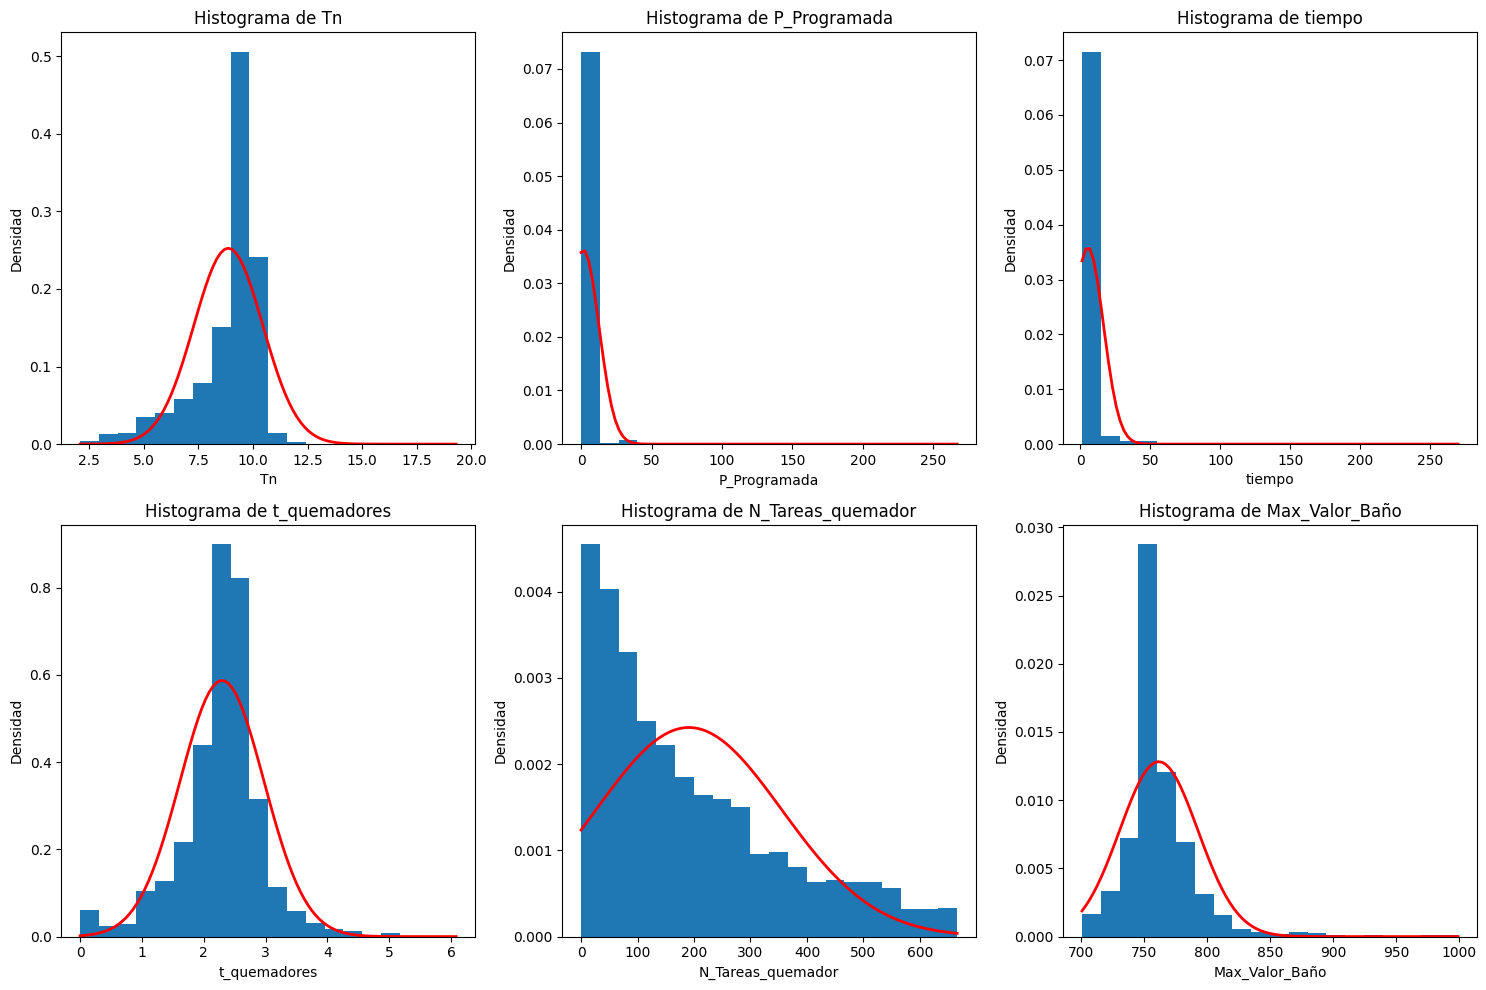

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Definir el número de columnas y filas para la matriz de subplots
num_columnas = 3
num_filas = (len(variables_num) + num_columnas - 1) // num_columnas

# Crear la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))

# Iterar sobre las variables numéricas y generar los histogramas en los subplots
for i, variable in enumerate(variables_num):
    fila = i // num_columnas
    columna = i % num_columnas

    # Generar el histograma
    axs[fila, columna].hist(data[variable], bins=20, density=True)  # density=True para obtener densidad en lugar de frecuencia

    # Calcular los parámetros de la distribución normal (media y desviación estándar)
    media = np.mean(data[variable])
    desviacion = np.std(data[variable])

    # Generar la curva de Gauss
    x = np.linspace(data[variable].min(), data[variable].max(), 100)
    y = norm.pdf(x, loc=media, scale=desviacion)
    axs[fila, columna].plot(x, y, 'r-', linewidth=2)  # Trazar la curva de Gauss en color rojo

    axs[fila, columna].set_xlabel(variable)
    axs[fila, columna].set_ylabel('Densidad')
    axs[fila, columna].set_title('Histograma de ' + variable )

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la visualización
plt.show()


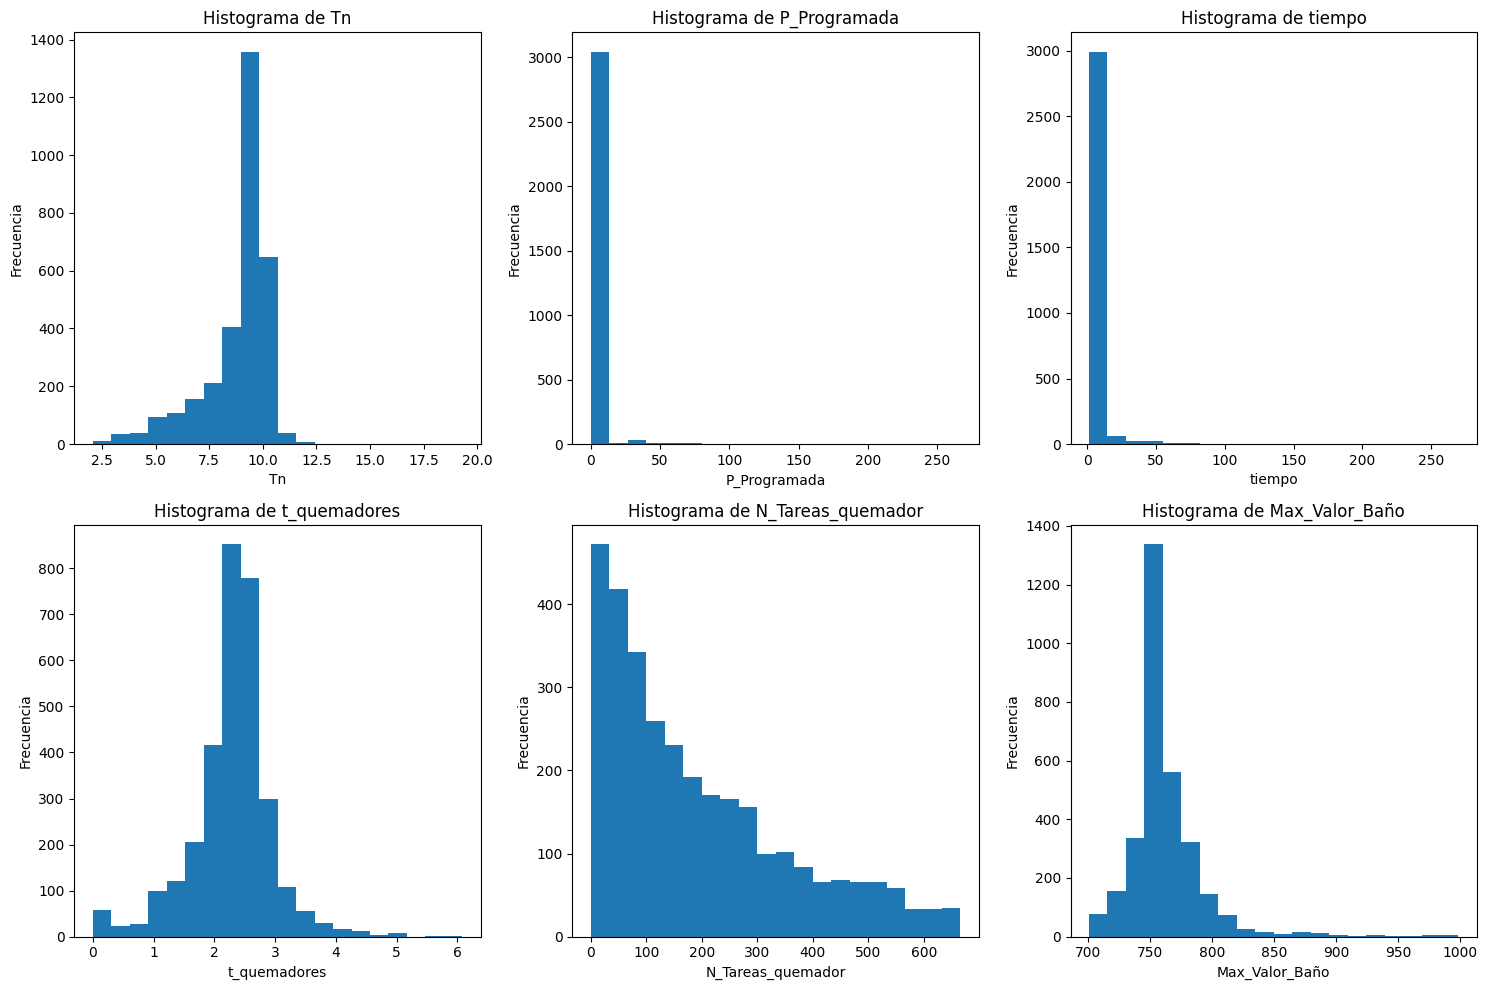

In [37]:
import matplotlib.pyplot as plt

# Definir el número de columnas y filas para la matriz de subplots
num_columnas = 3
num_filas = (len(variables_num) + num_columnas - 1) // num_columnas

# Crear la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))

# Iterar sobre las variables numéricas y generar los histogramas en los subplots
for i, variable in enumerate(variables_num):
    fila = i // num_columnas
    columna = i % num_columnas
    axs[fila, columna].hist(data[variable], bins=20)  # Puedes ajustar el número de bins según tus necesidades
    axs[fila, columna].set_xlabel(variable)
    axs[fila, columna].set_ylabel('Frecuencia')
    axs[fila, columna].set_title('Histograma de ' + variable)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la visualización
plt.show()


In [38]:
data['metros3portonelada'] = data['metros3portonelada'].str.replace(',', '.').astype(float)

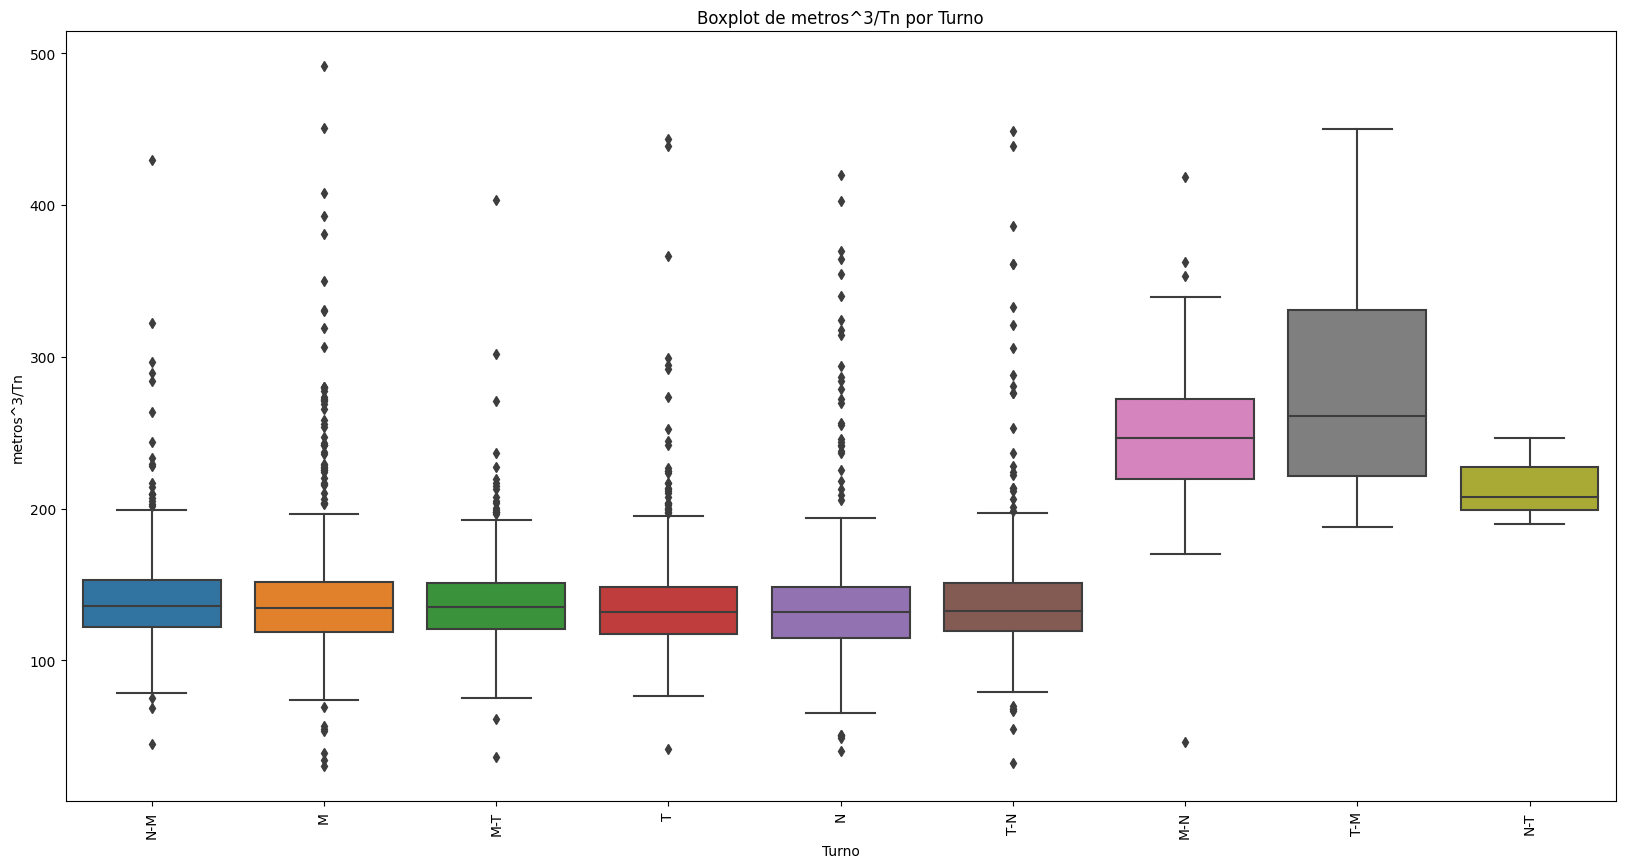

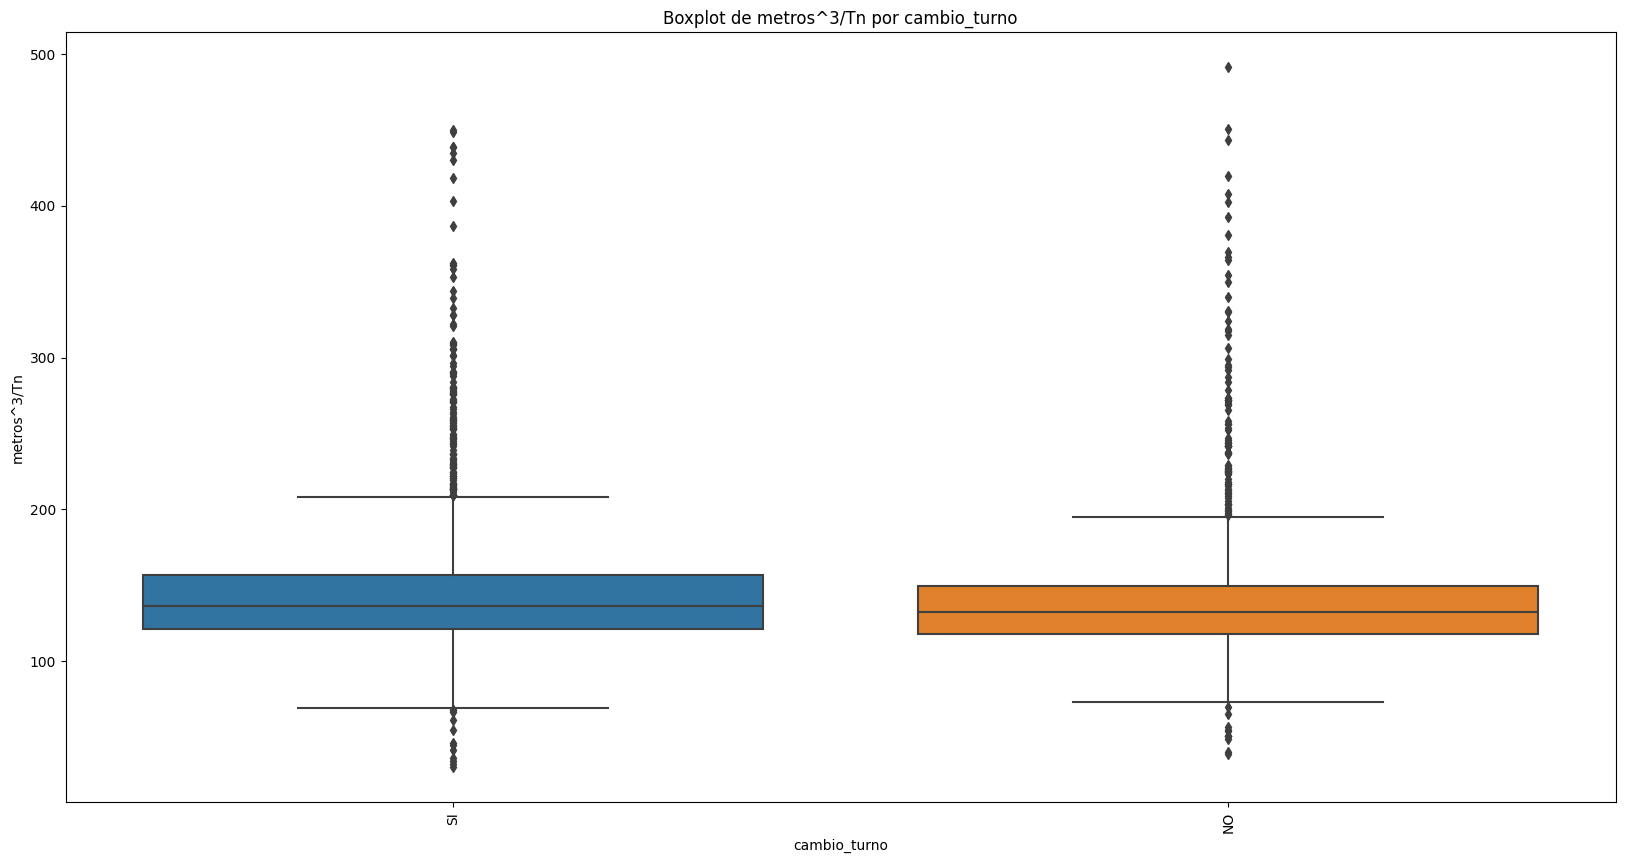

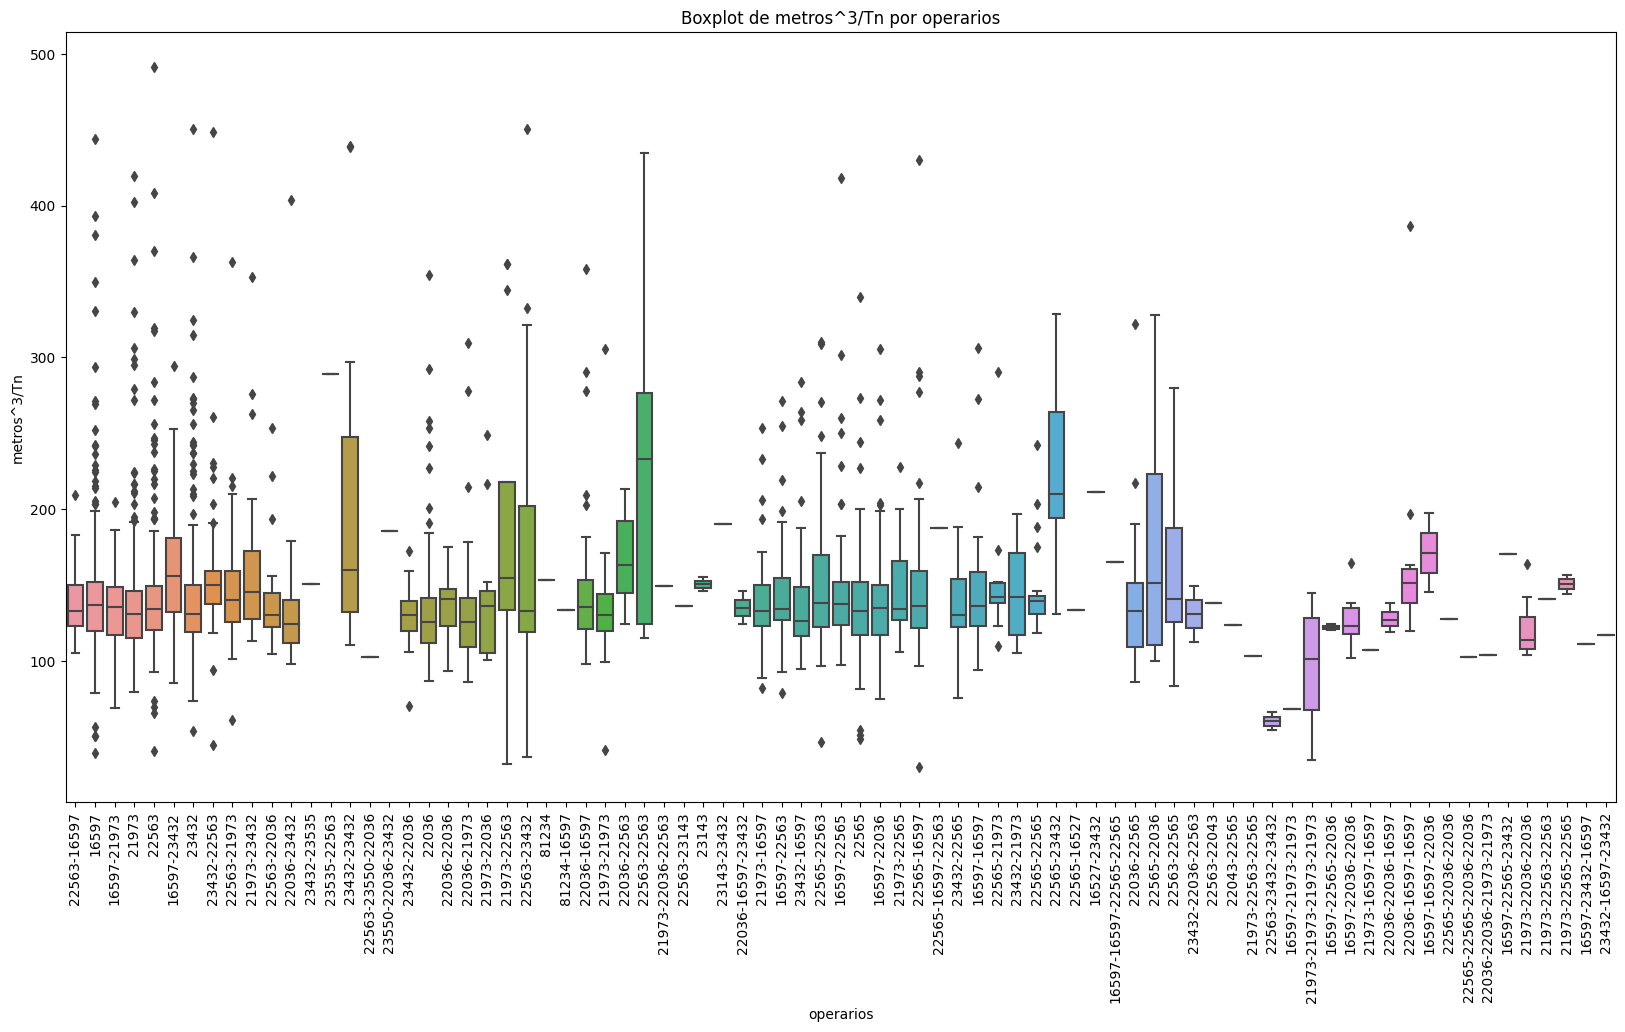

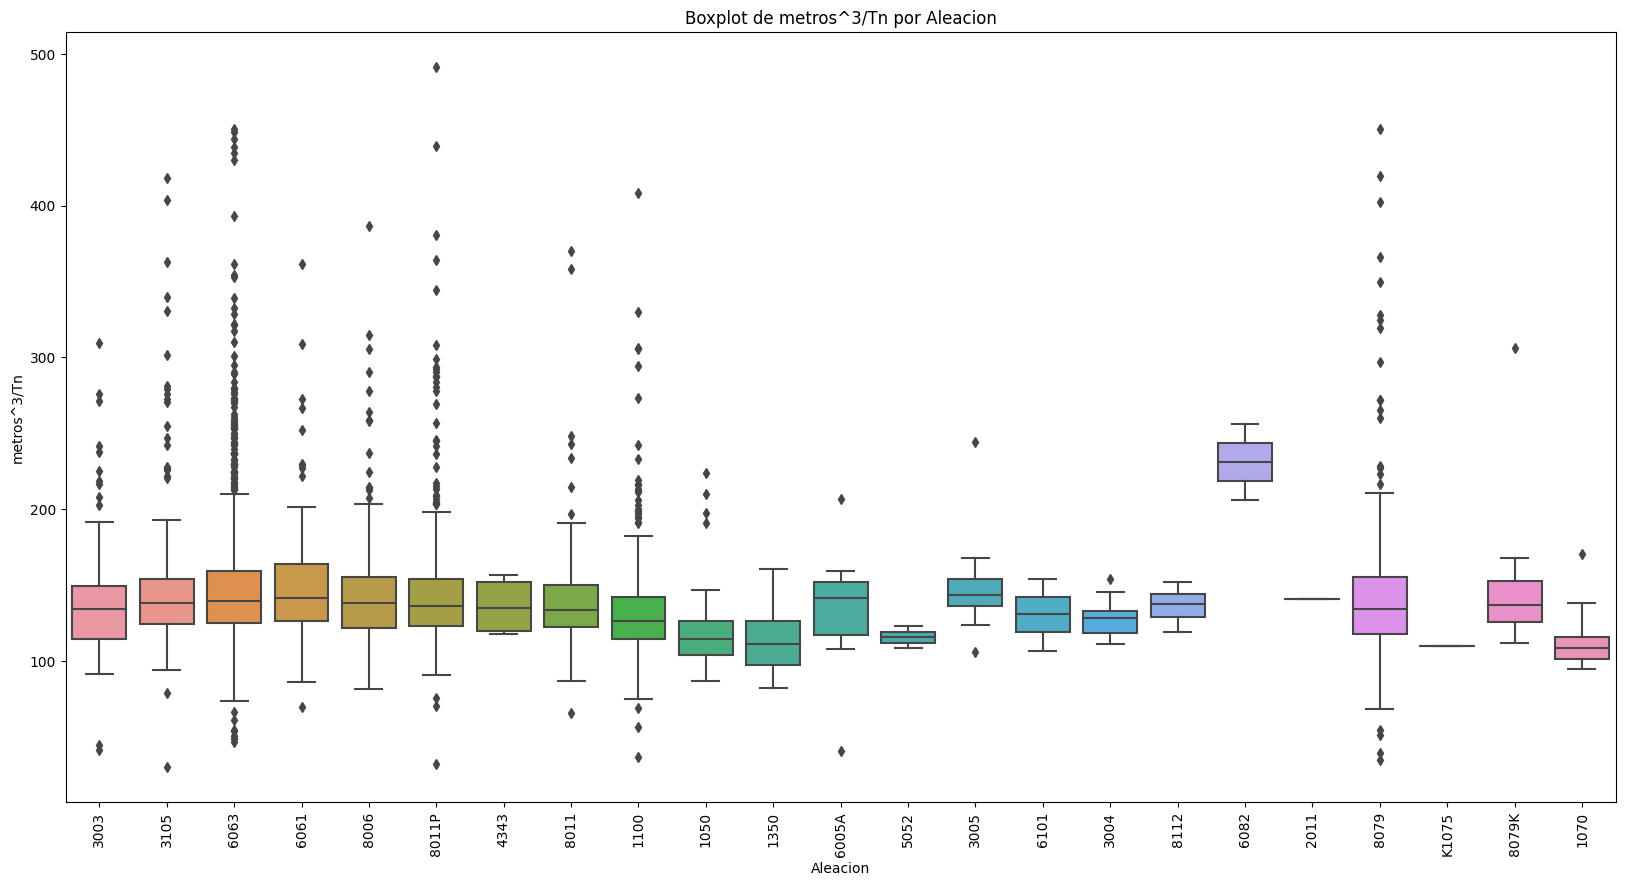

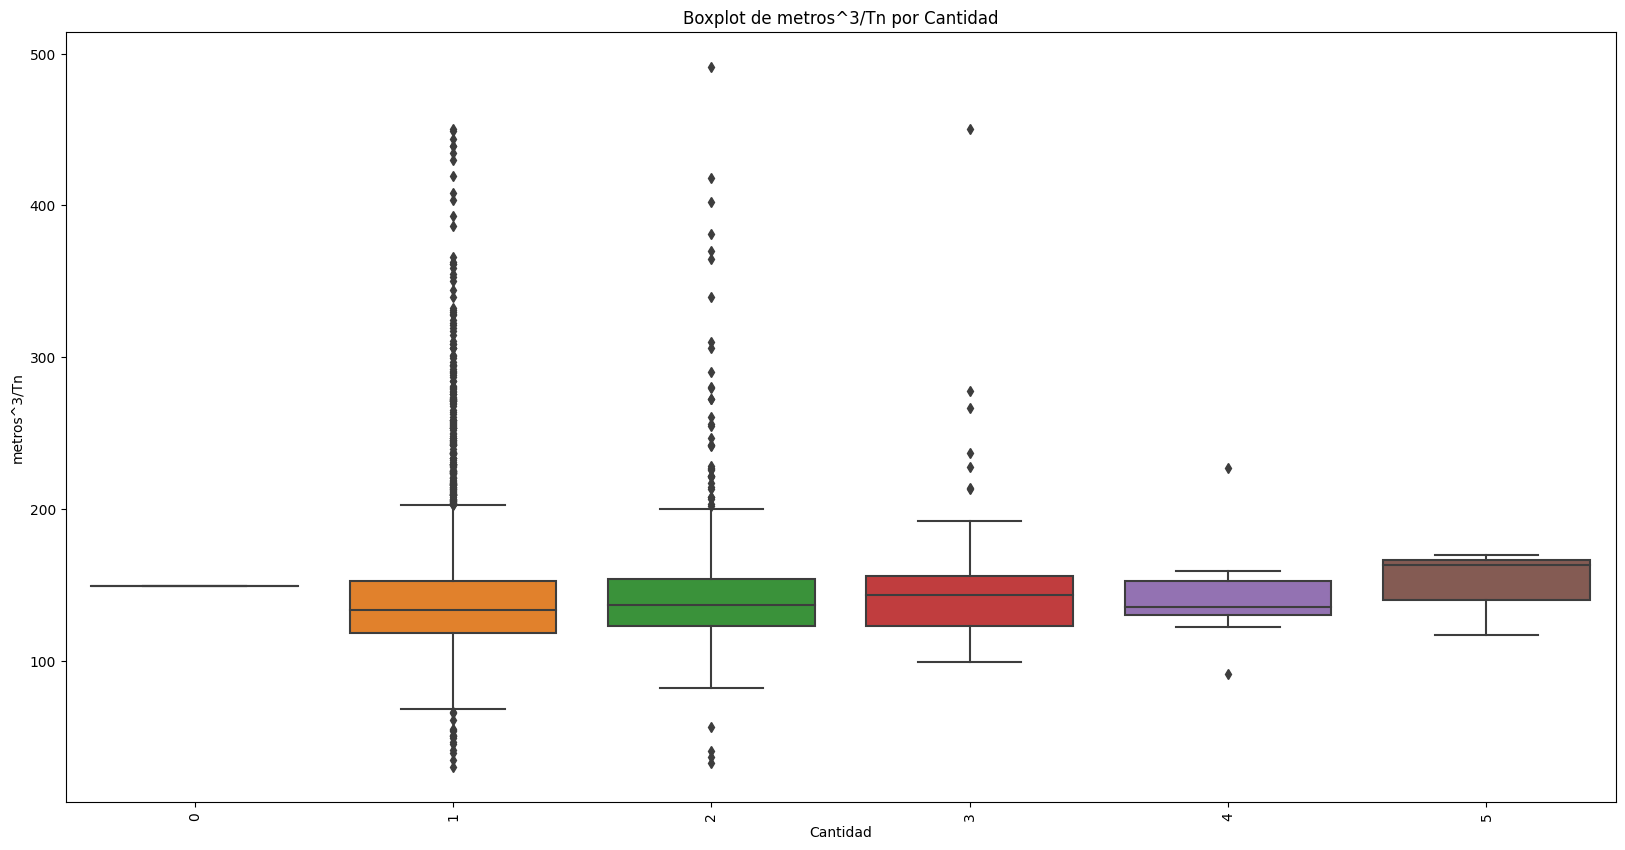

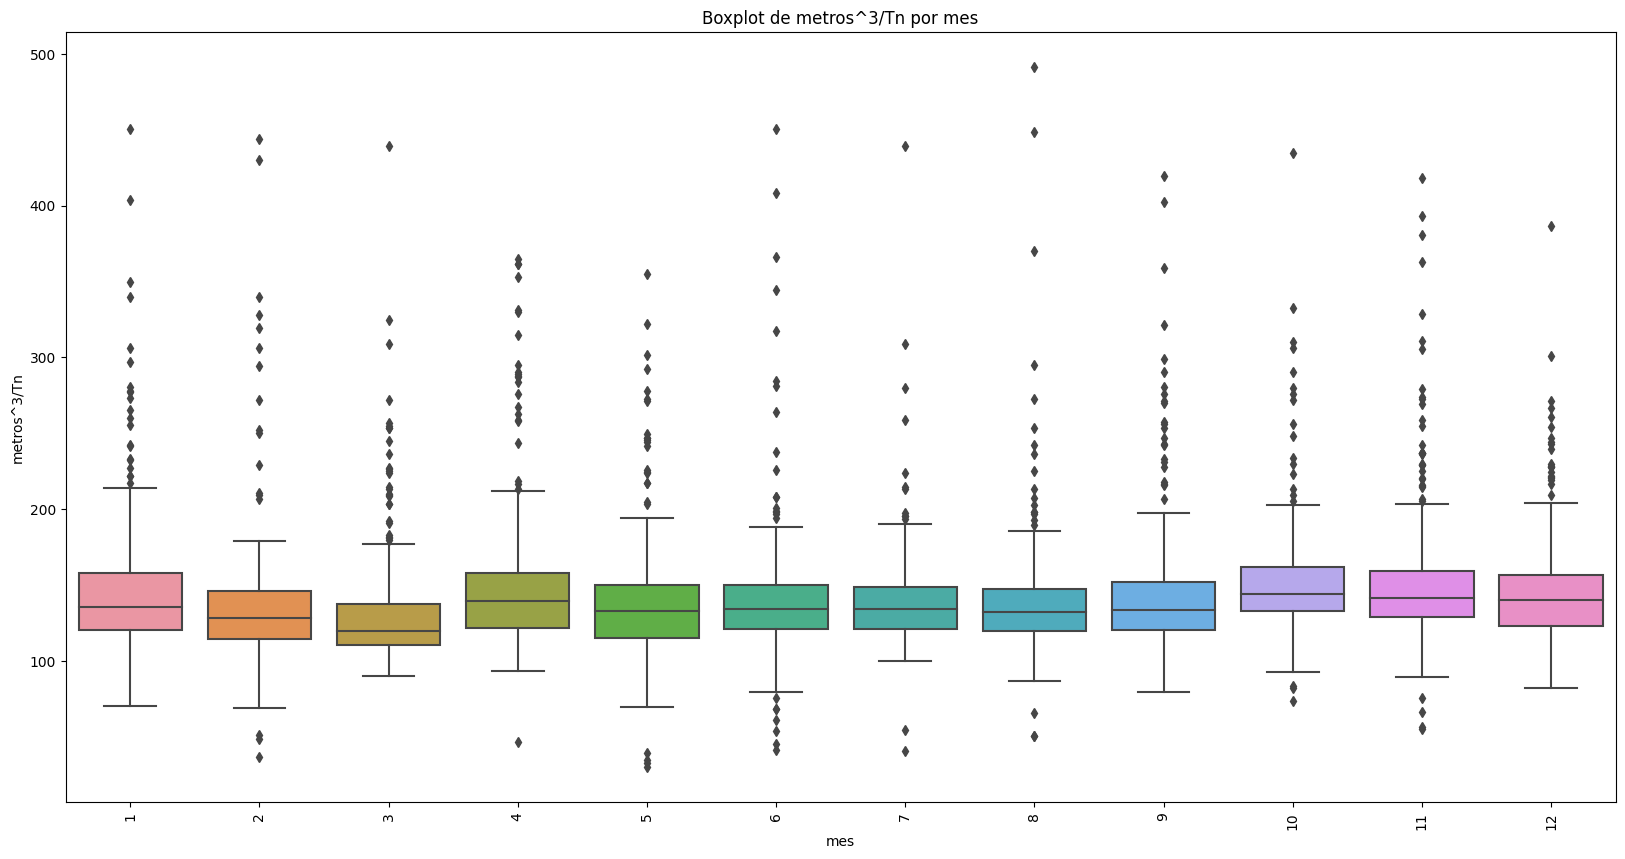

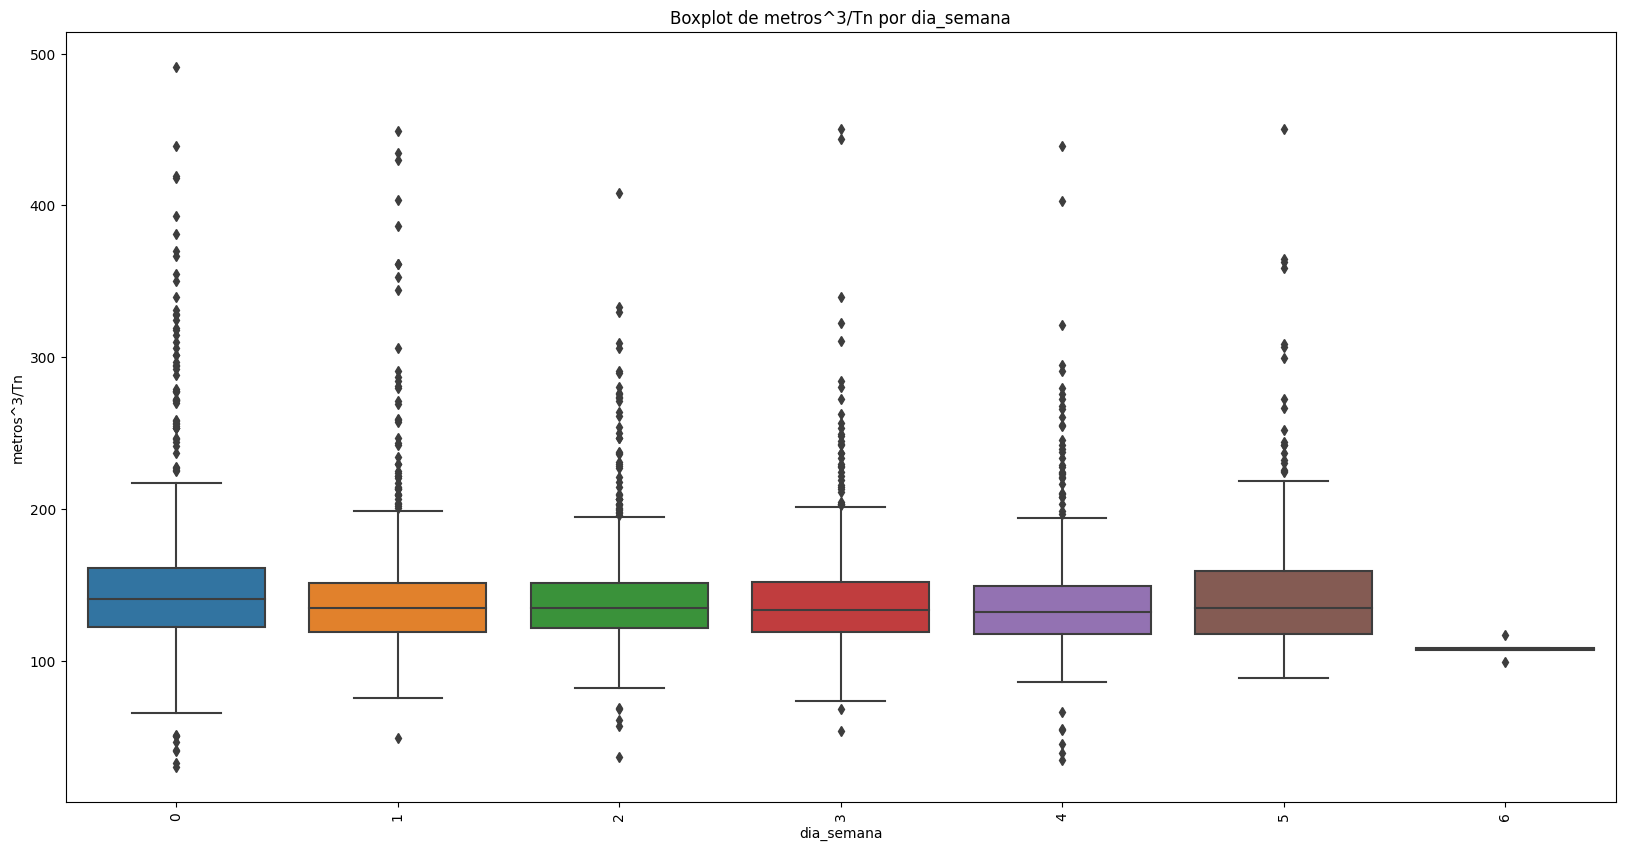

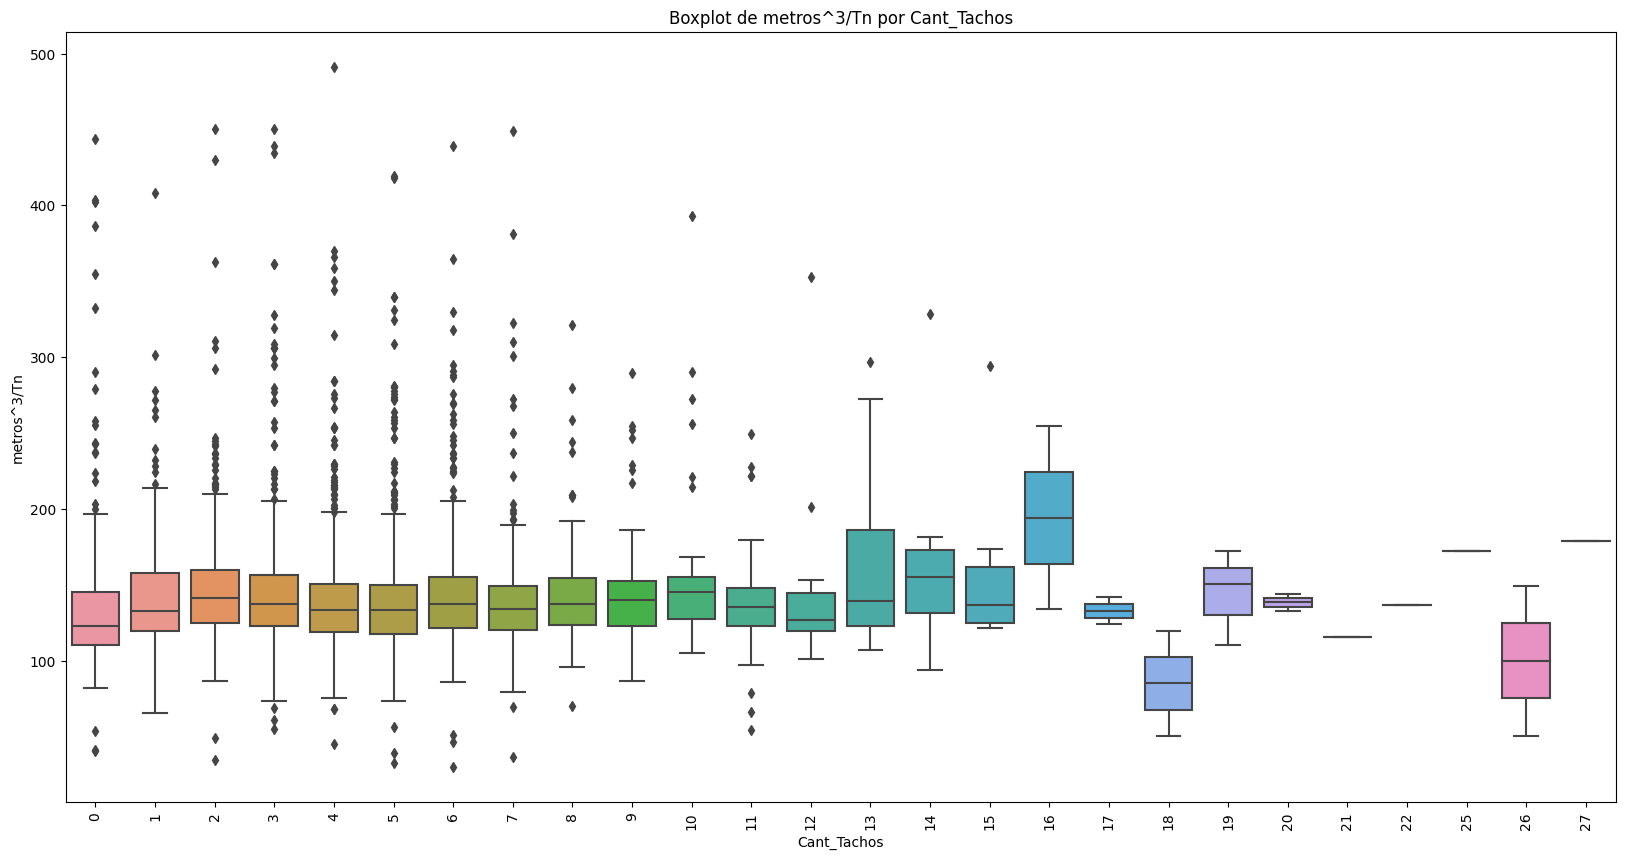

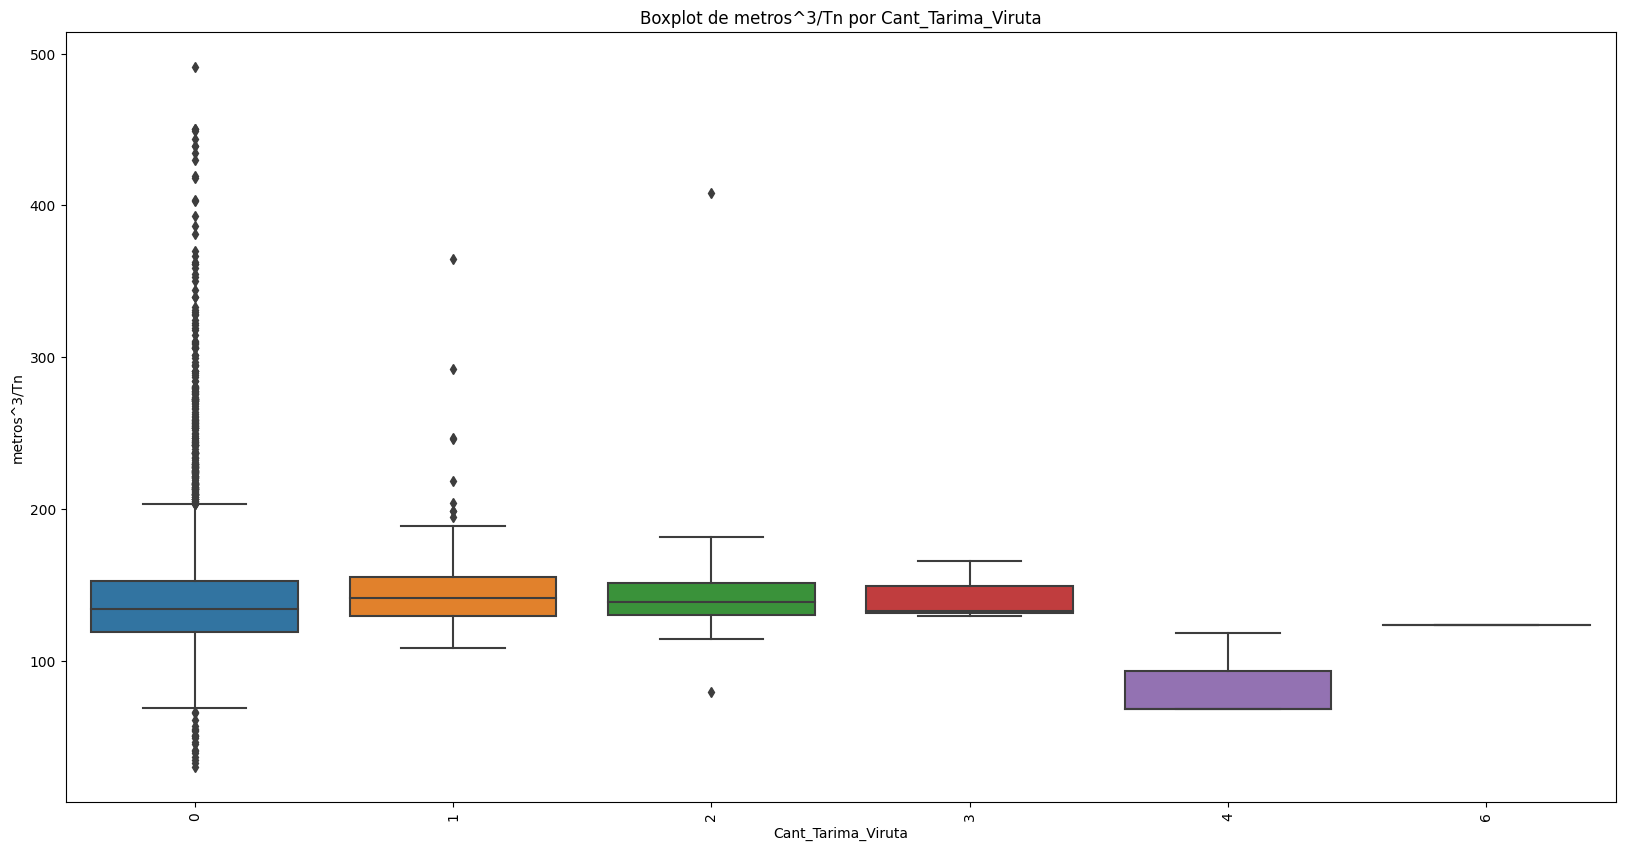

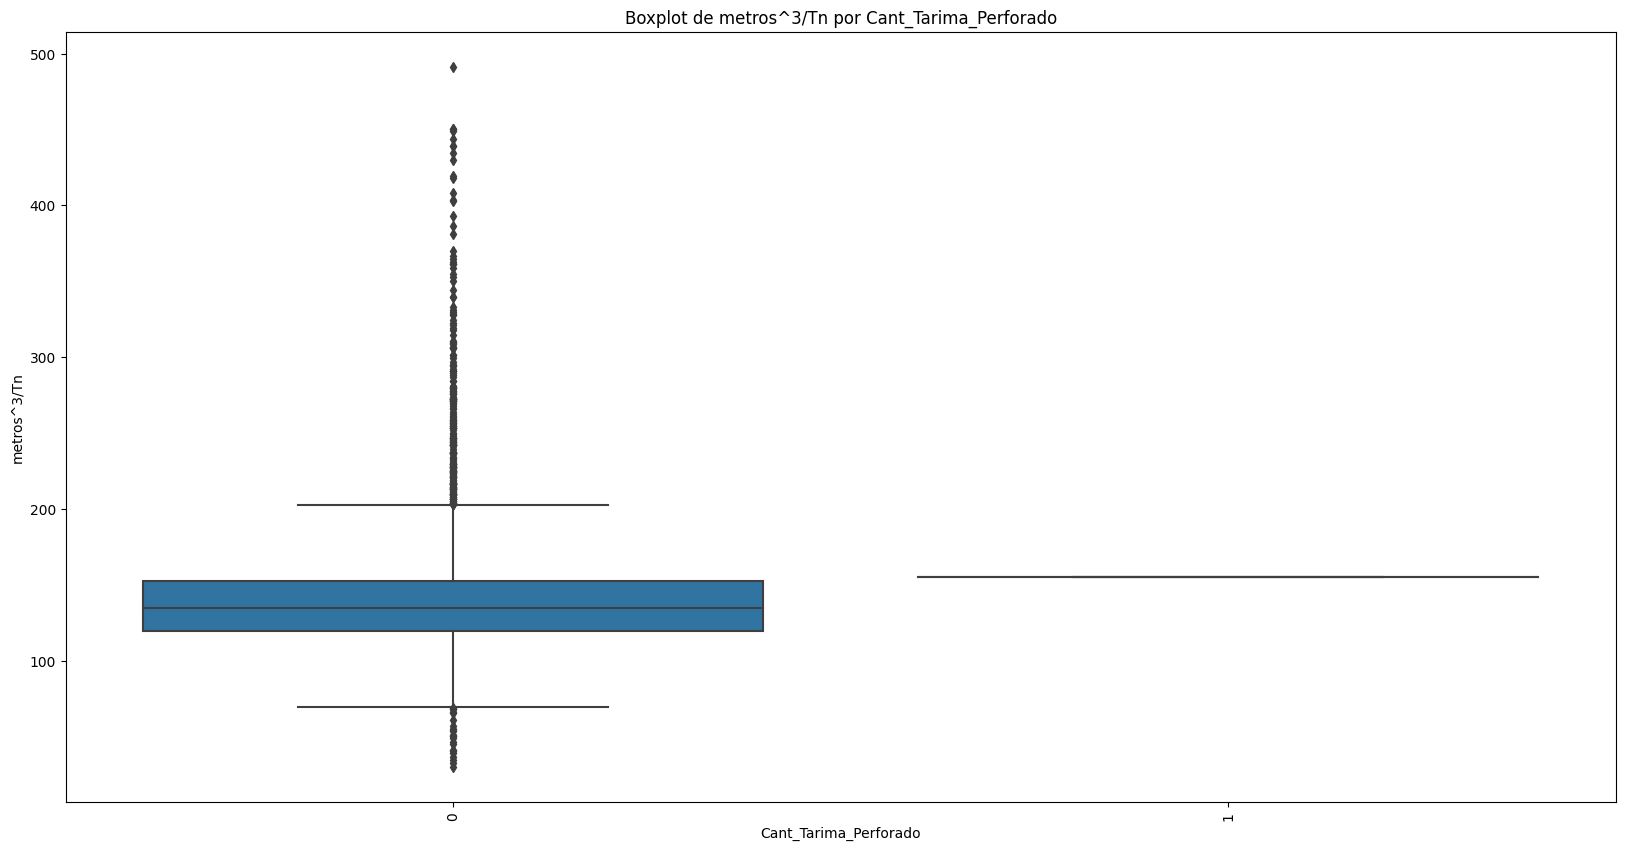

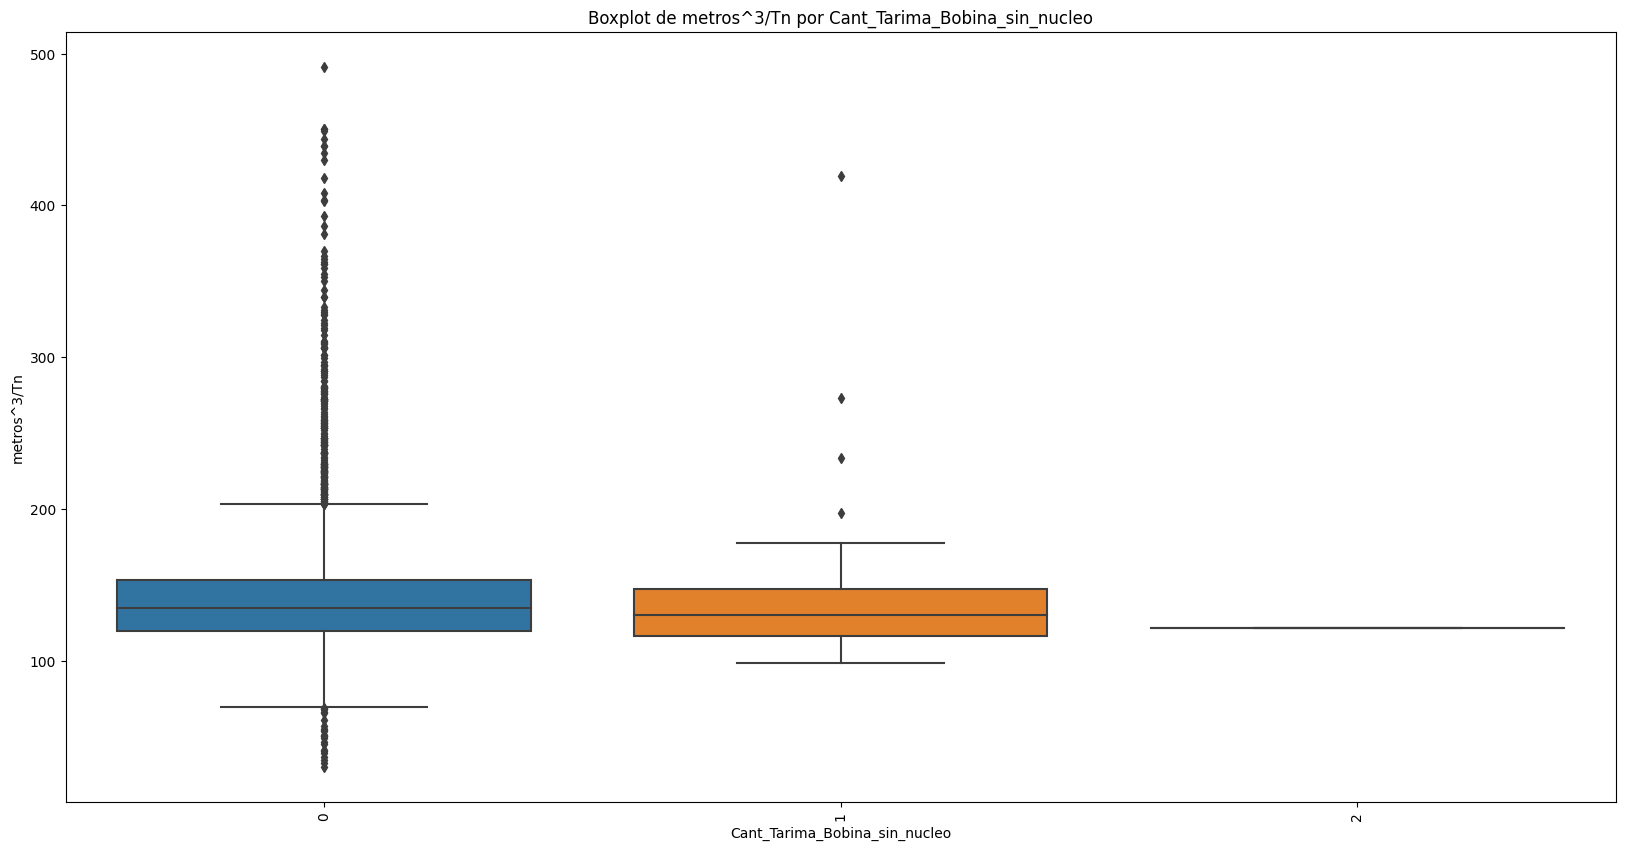

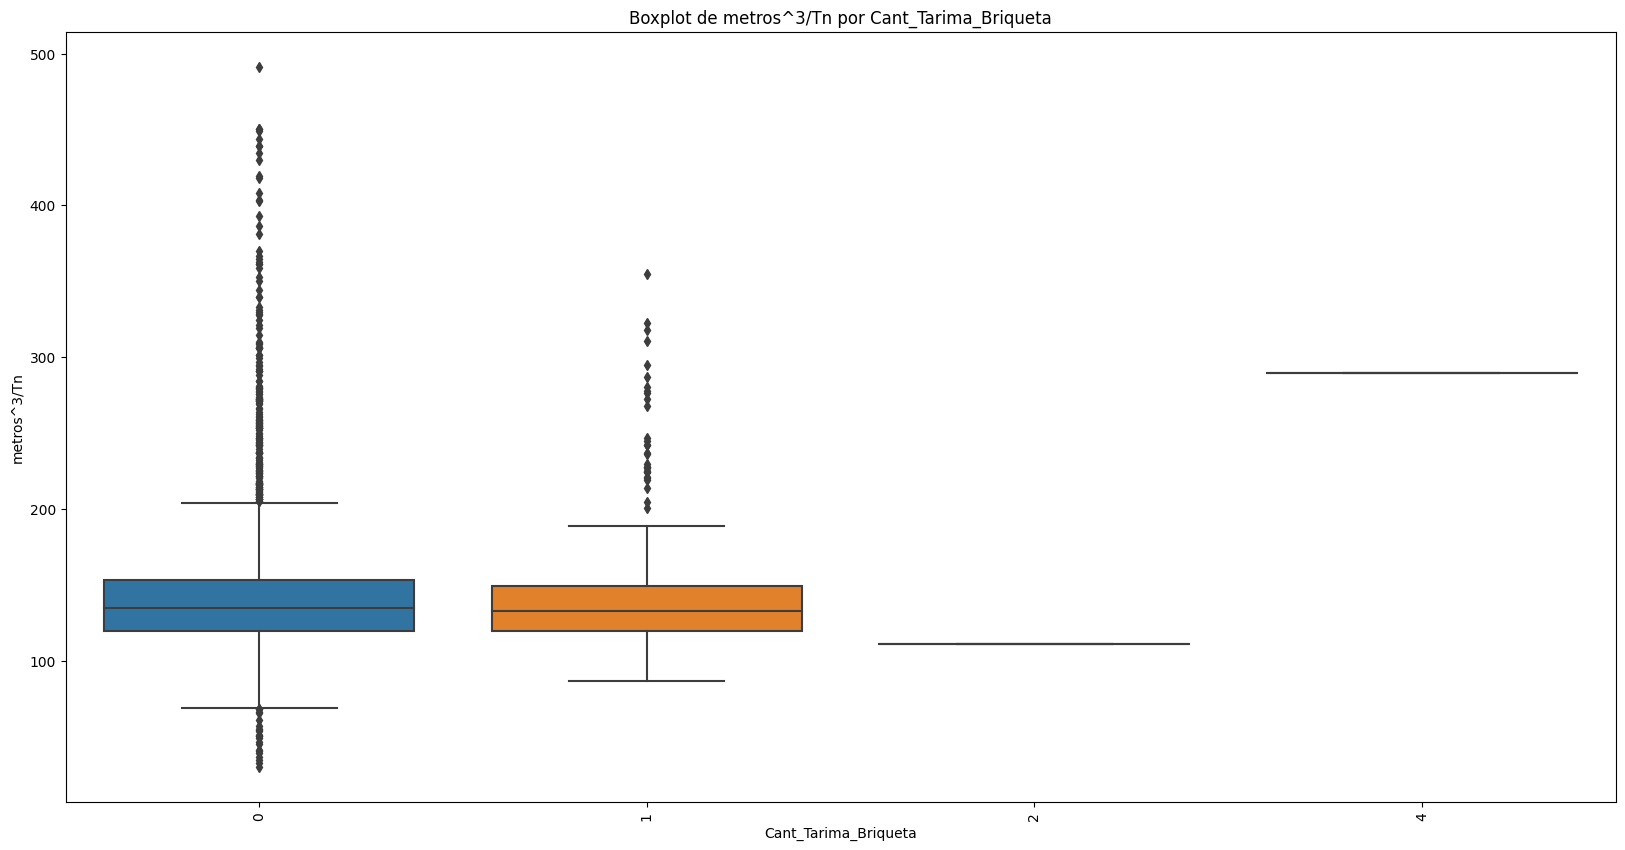

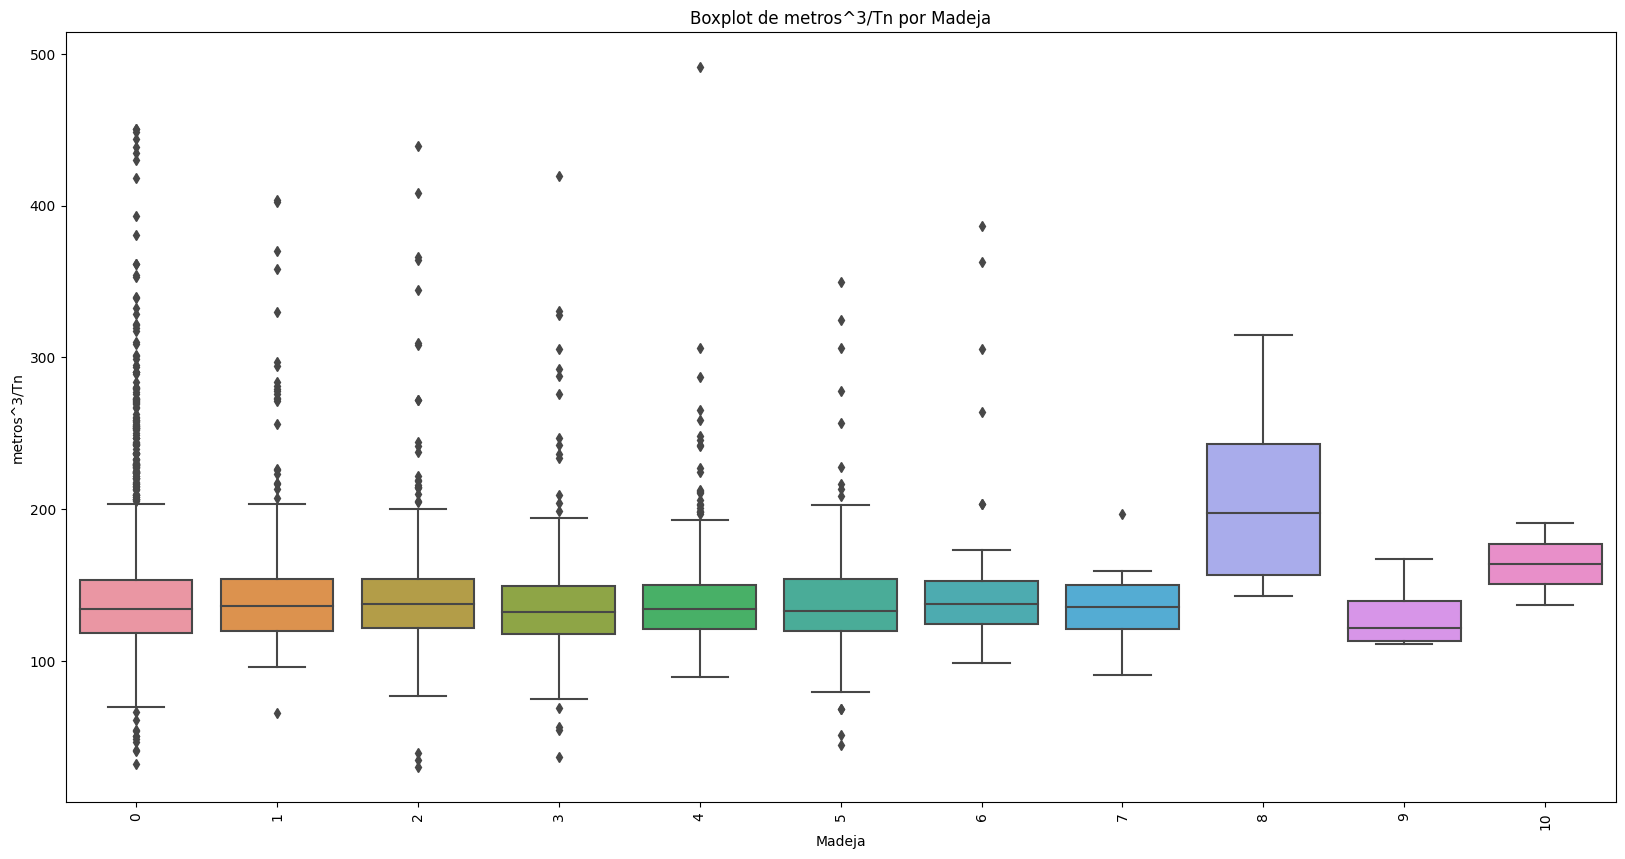

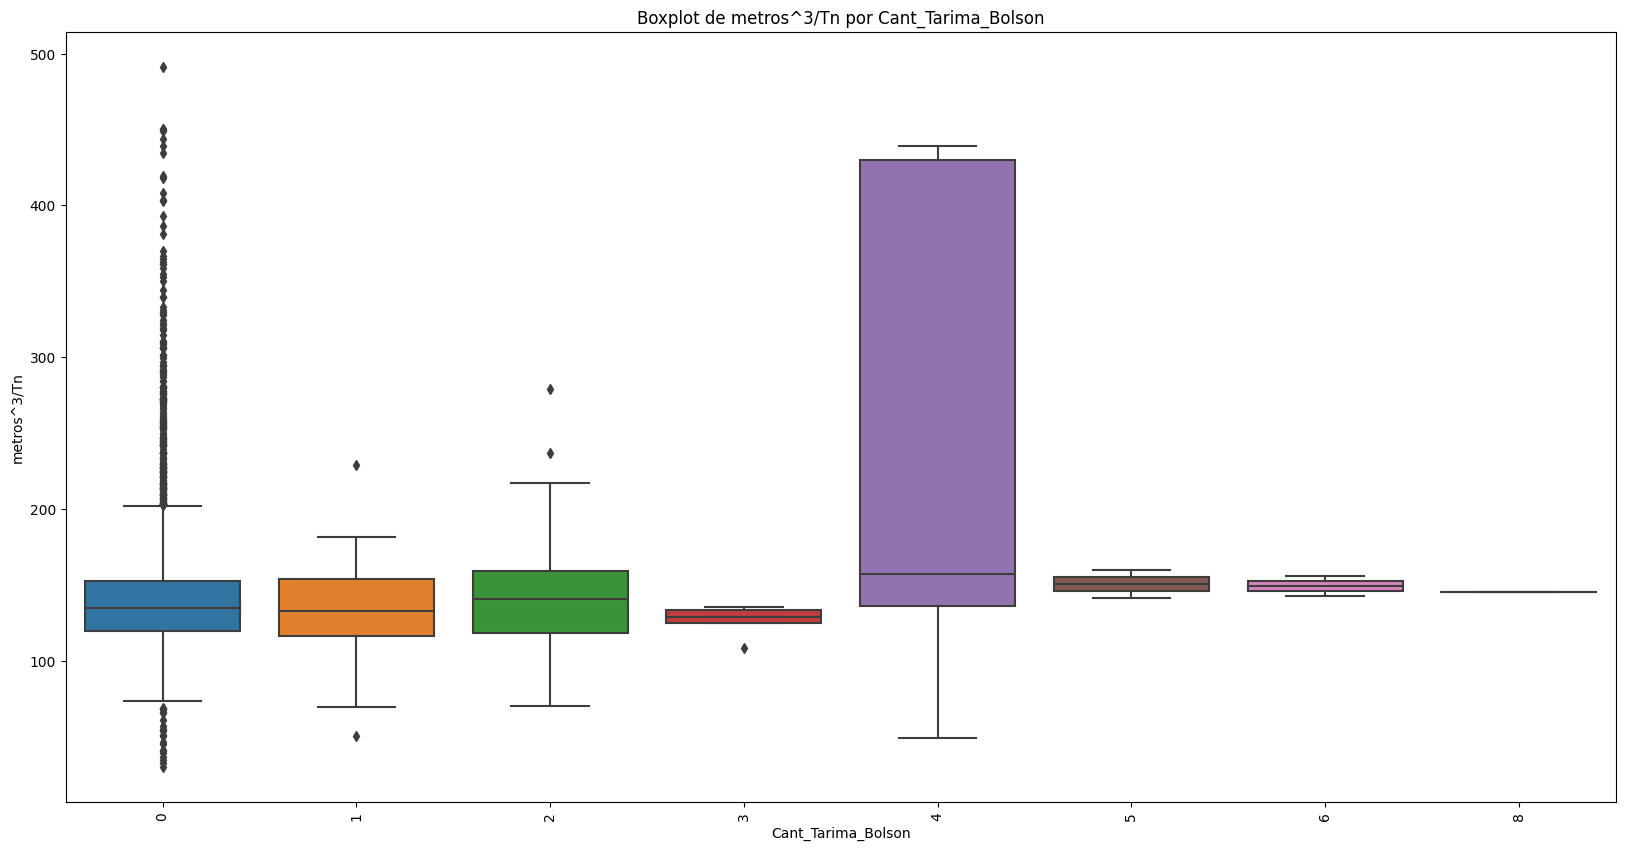

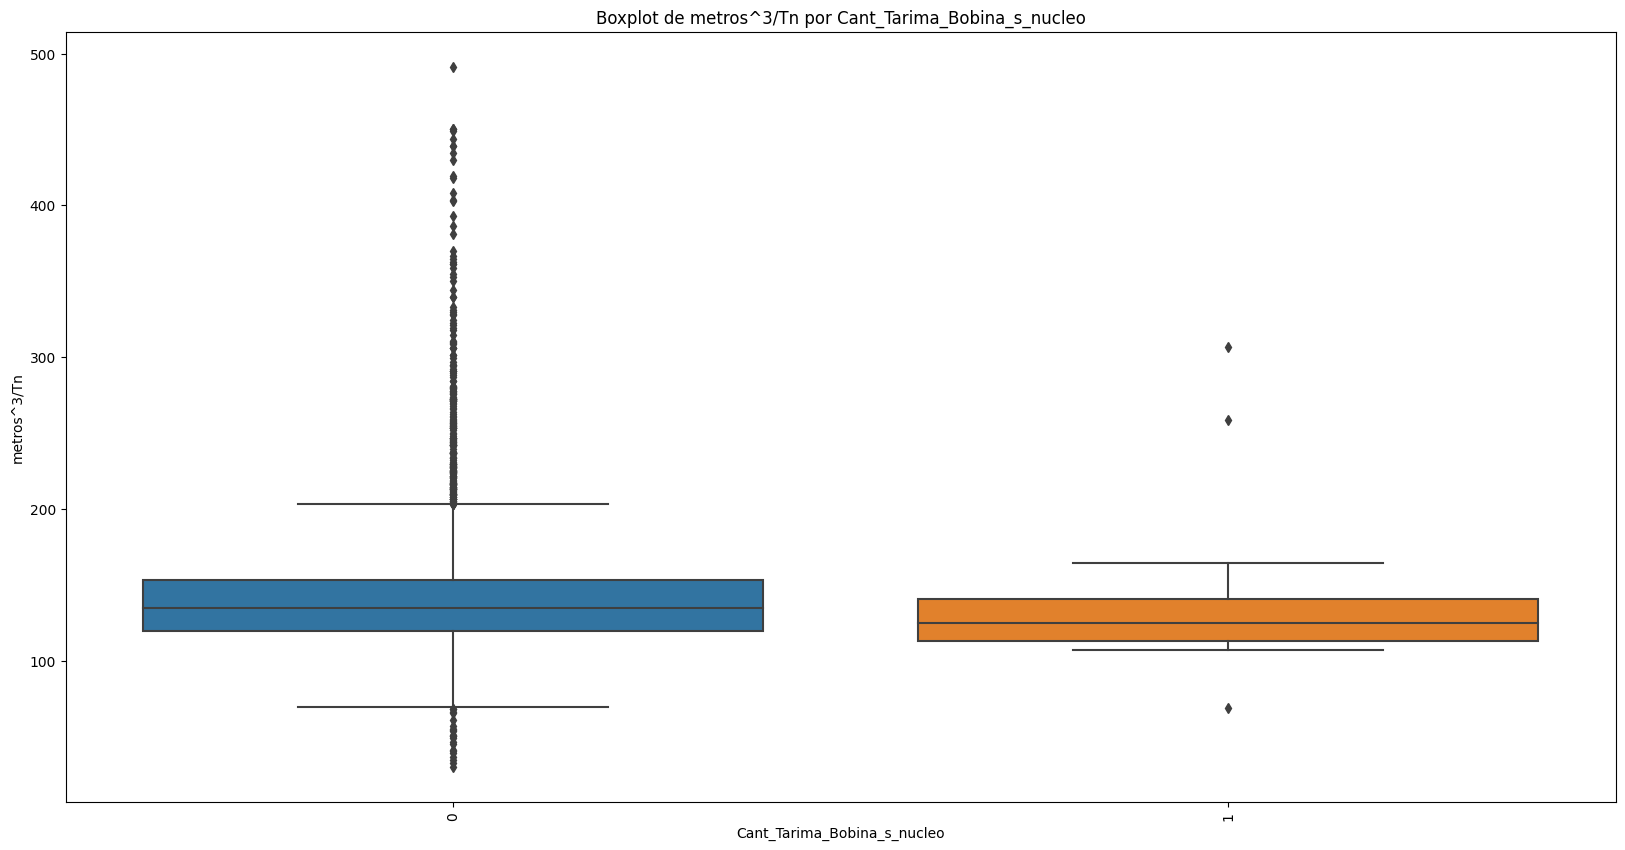

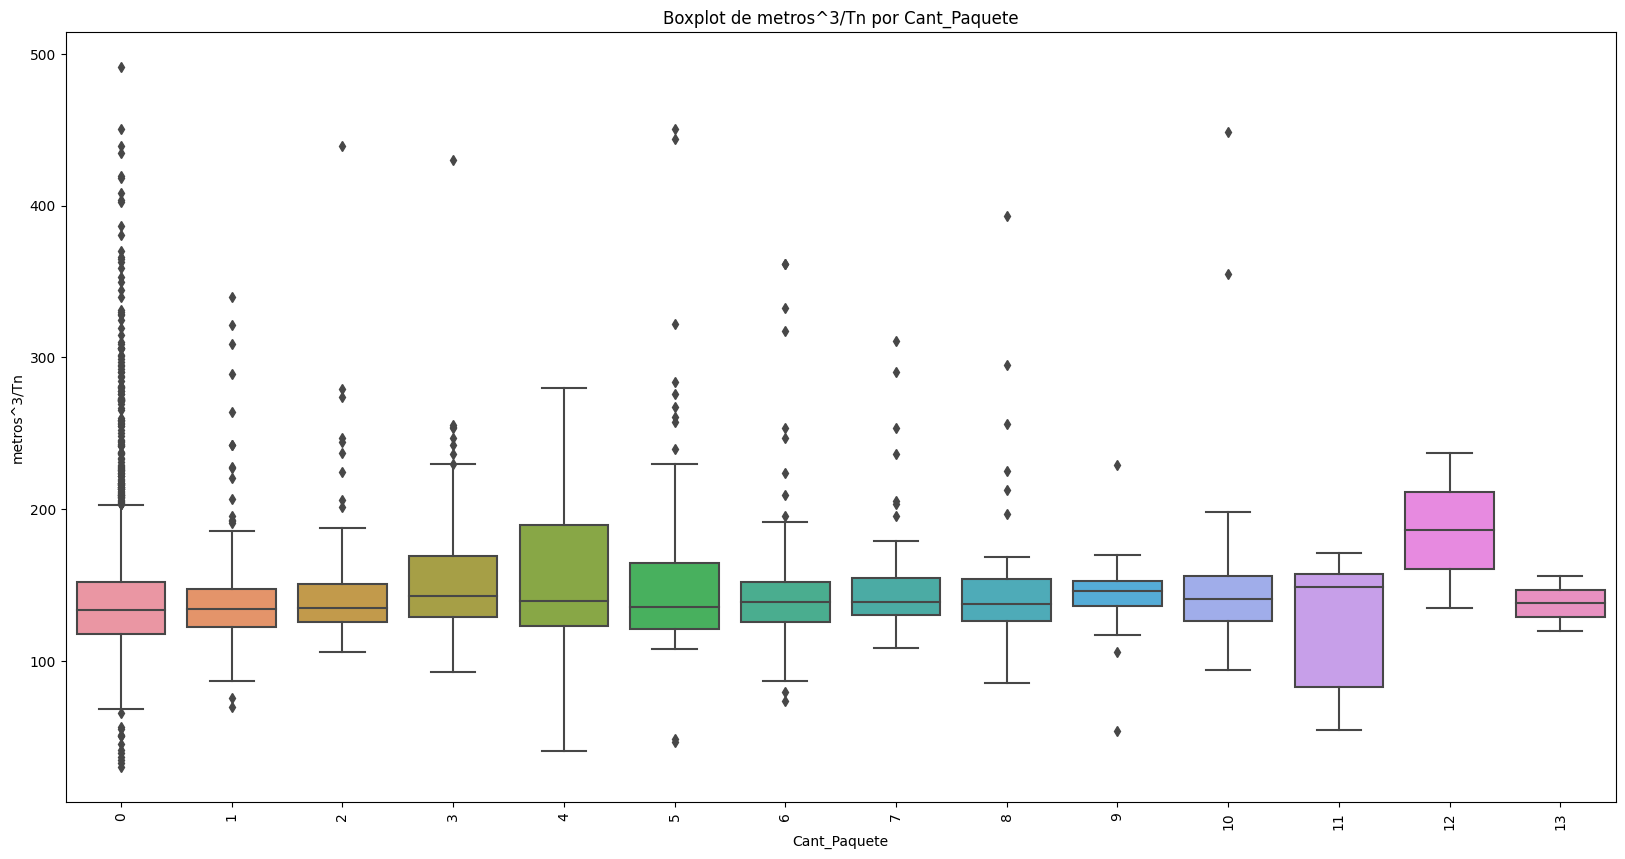

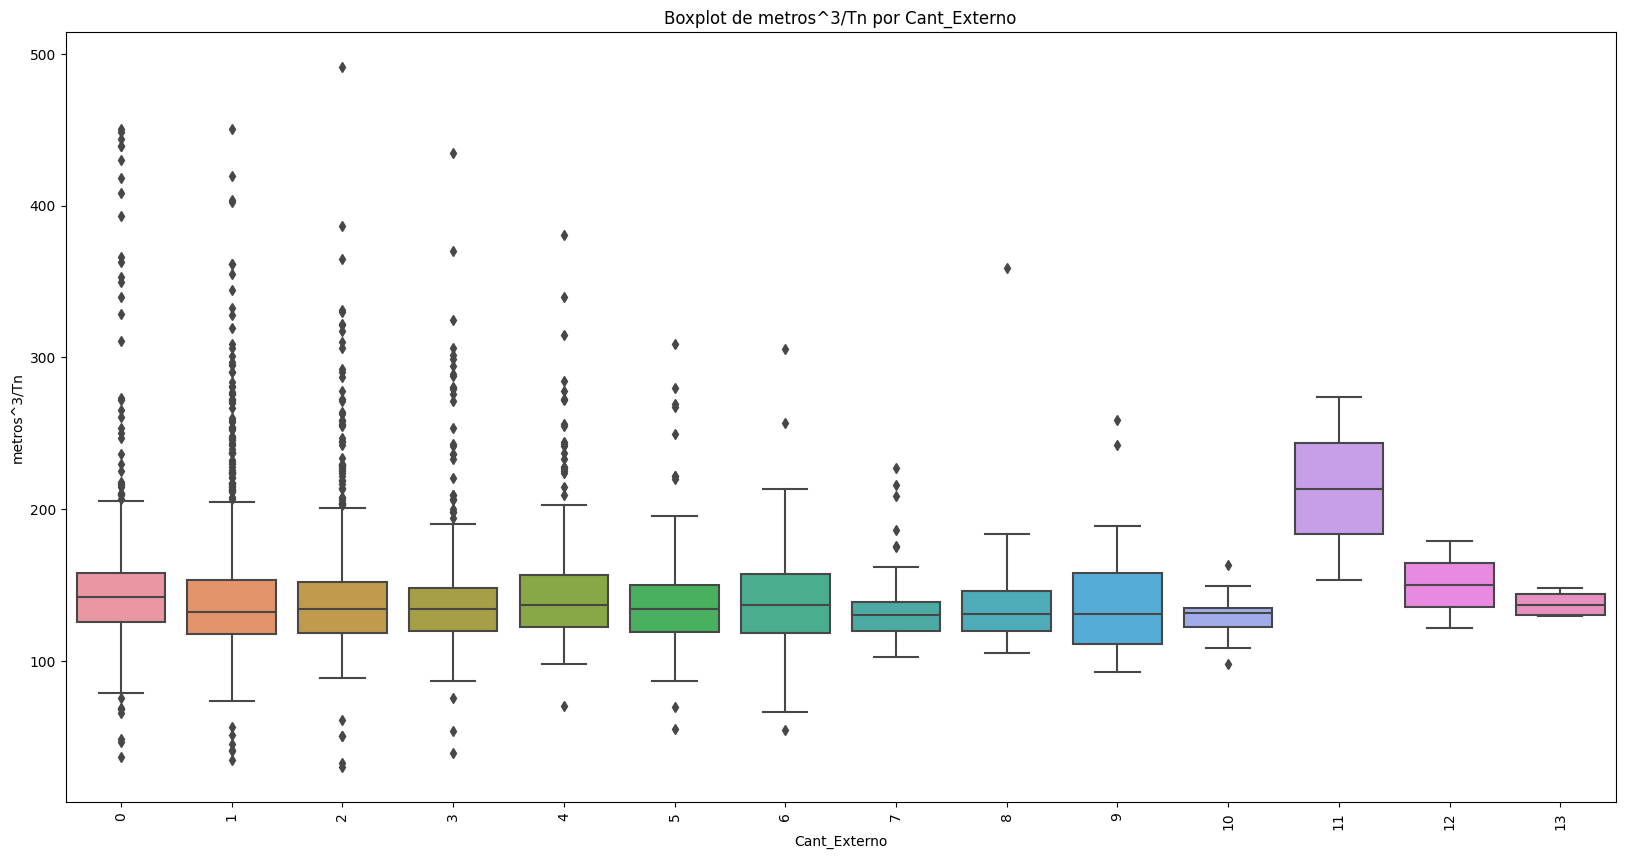

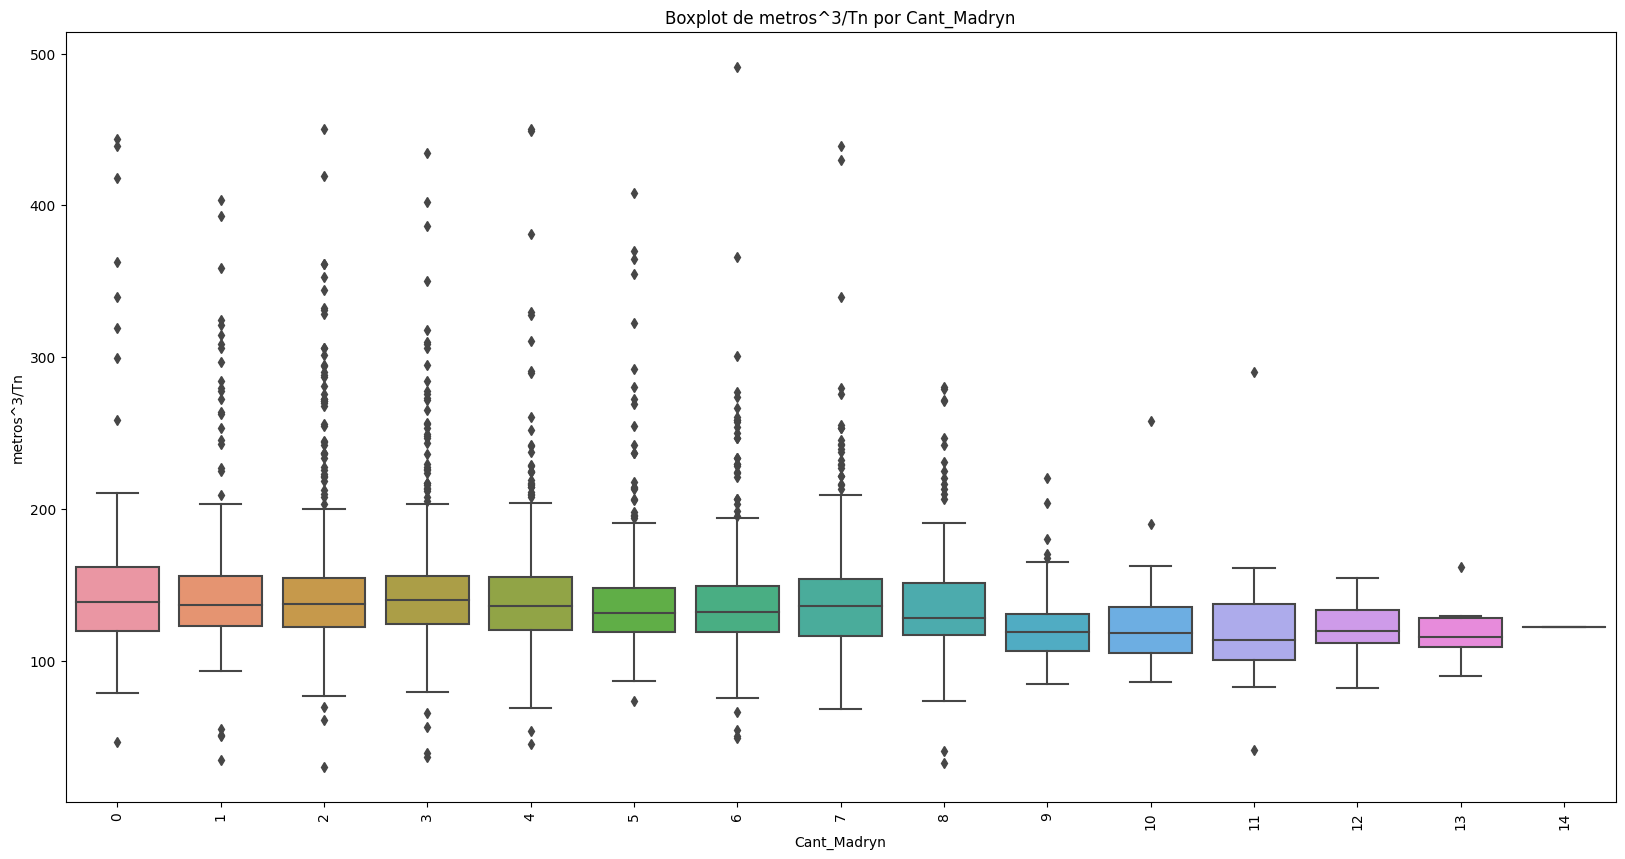

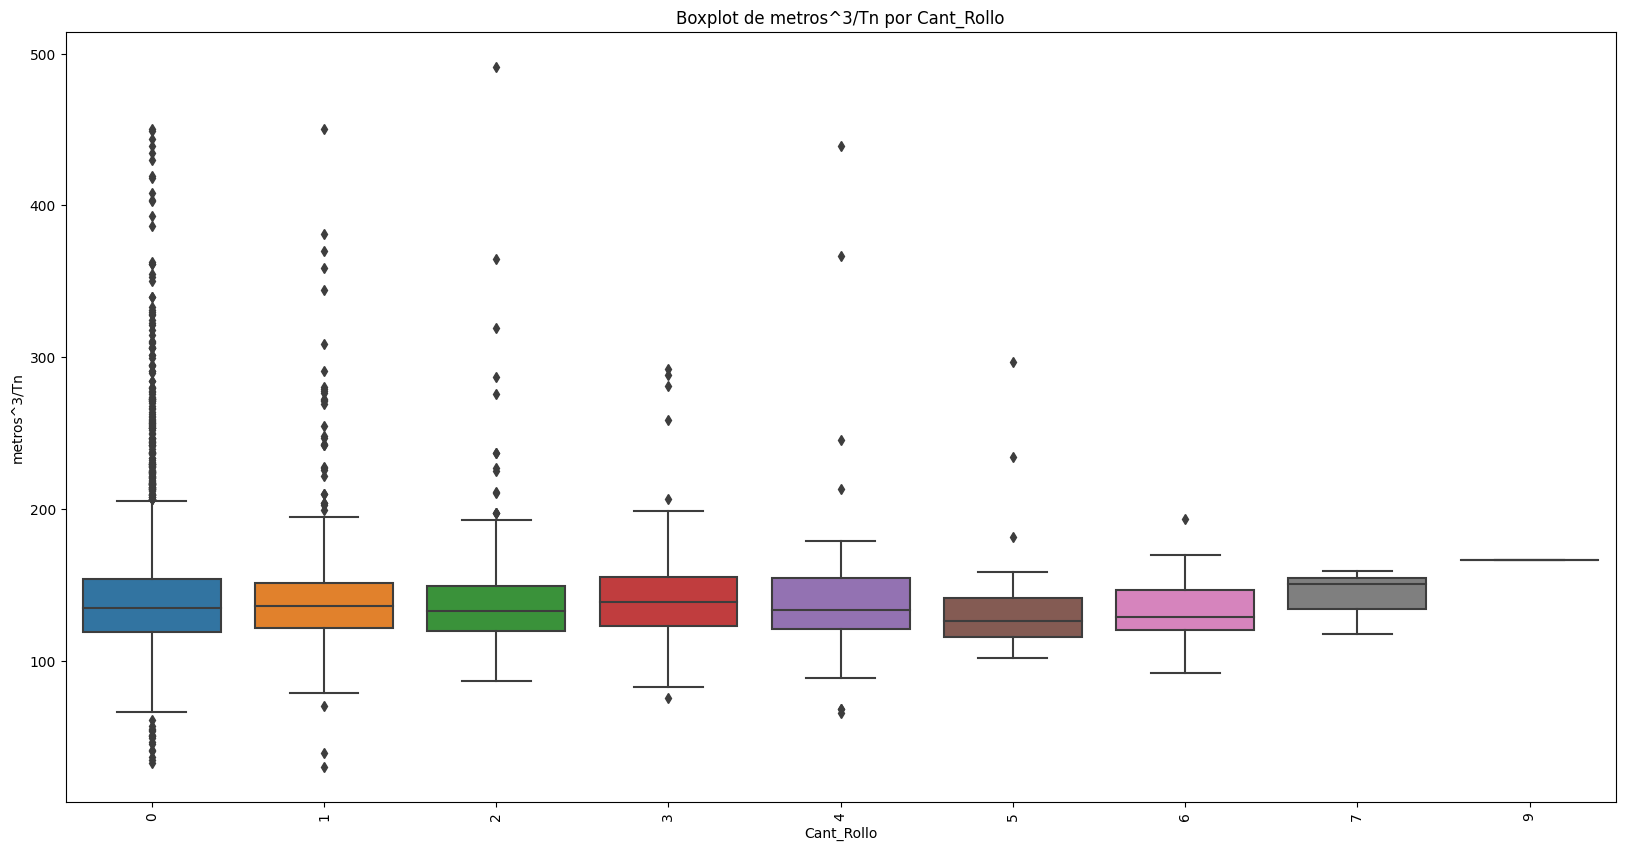

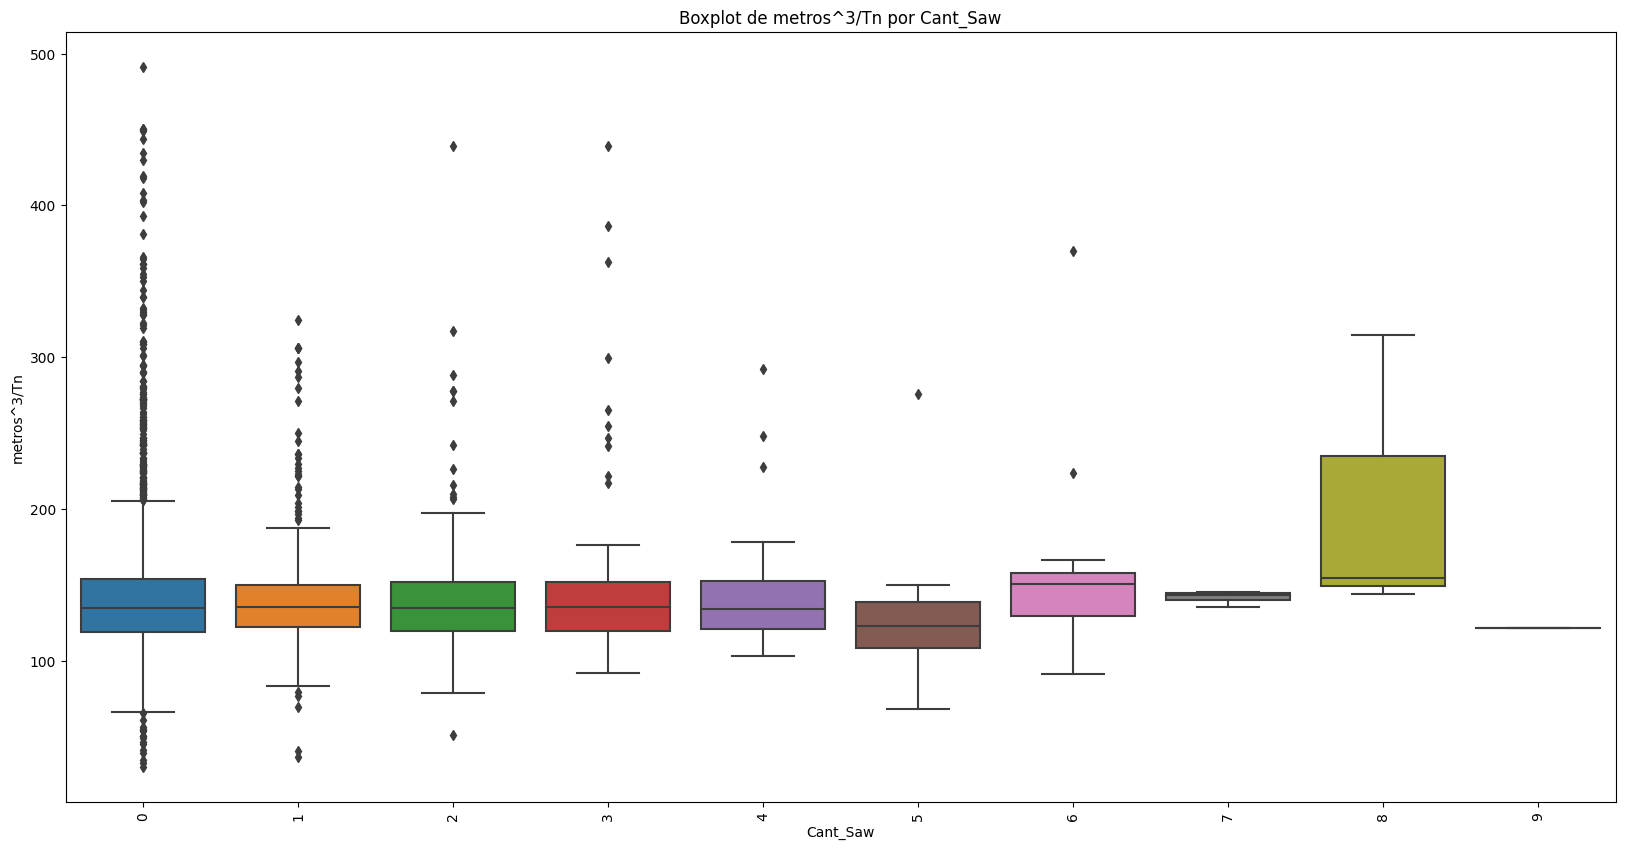

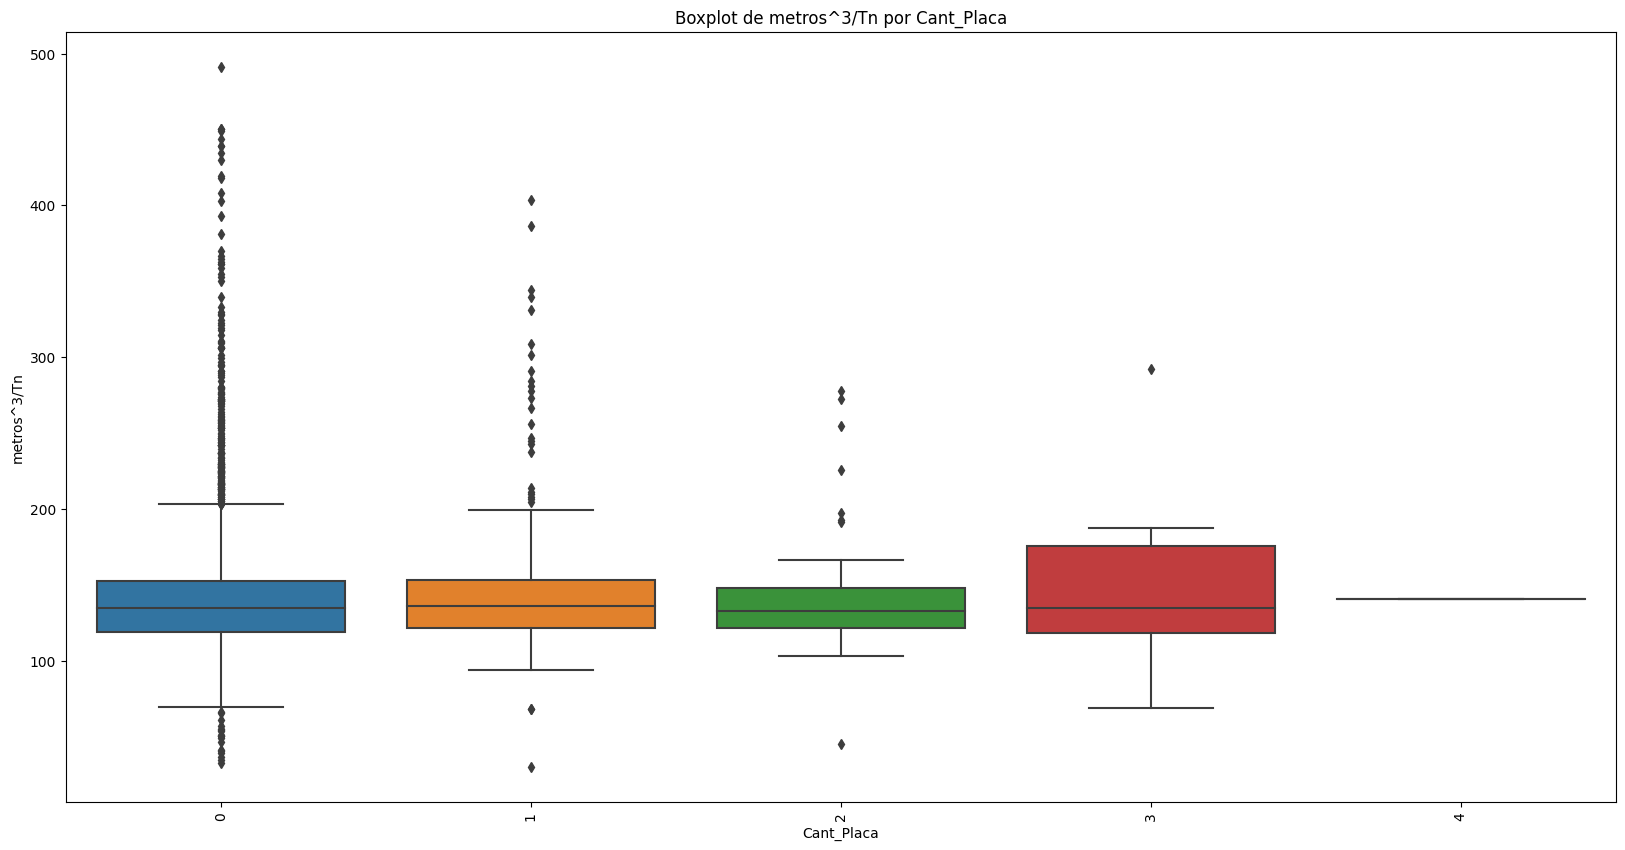

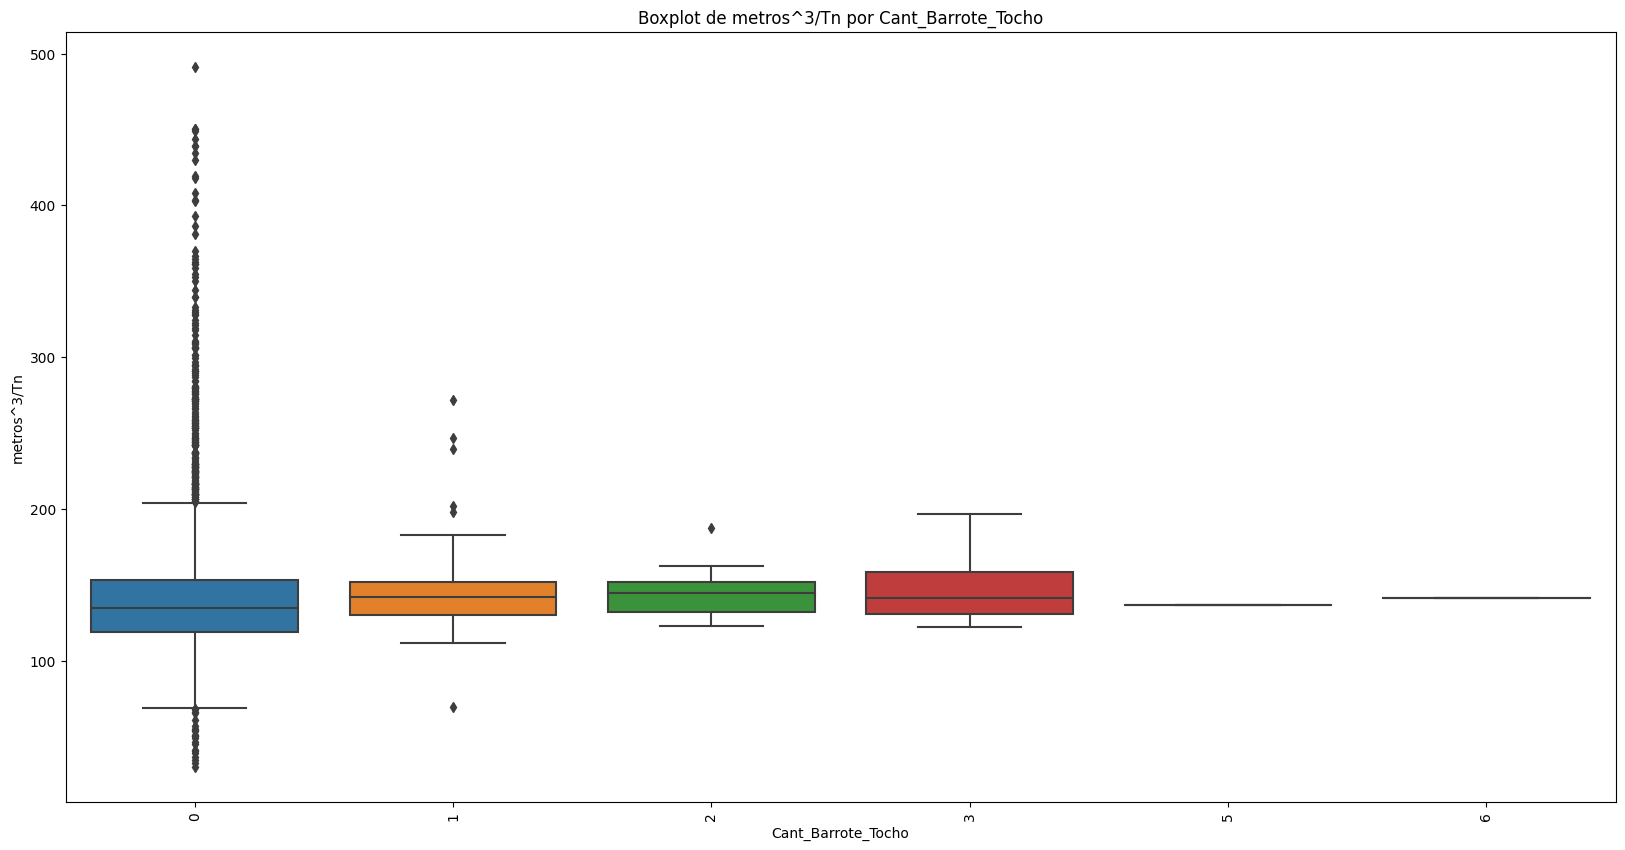

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


# Crear un boxplot para cada variable categórica
for variable in variables_categoricas:
    plt.figure(figsize=(20, 10))
    sns.boxplot(x=variable, y='metros3portonelada', data=data)
    plt.title('Boxplot de metros^3/Tn por ' + variable)
    plt.ylabel('metros^3/Tn')
    plt.xticks(rotation=90)
    plt.show()

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el tamaño de fuente para los gráficos
sns.set(font_scale=2)

# Crear un boxplot para cada variable categórica
for variable in variables_categoricas:
    plt.figure(figsize=(20, 10))
    sns.boxplot(x=variable, y='metros3portonelada', data=data)
    plt.title('Boxplot de metros^3/Tn por ' + variable)
    plt.ylabel('metros^3/Tn')
    plt.xticks(rotation=90)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

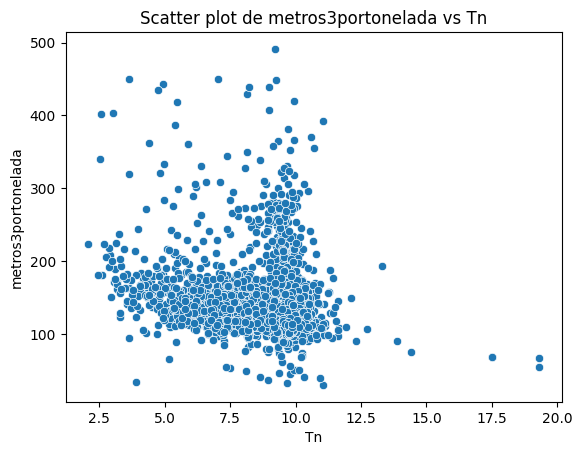

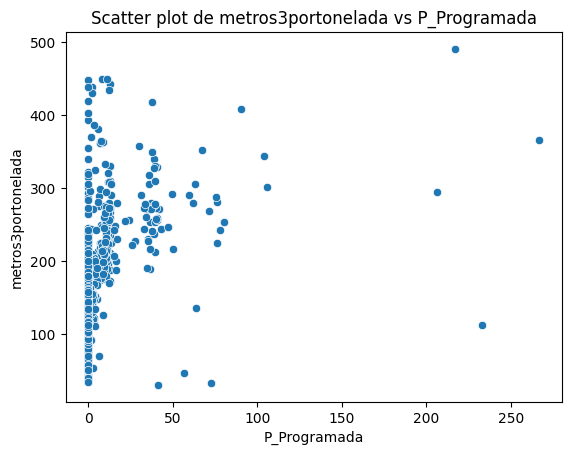

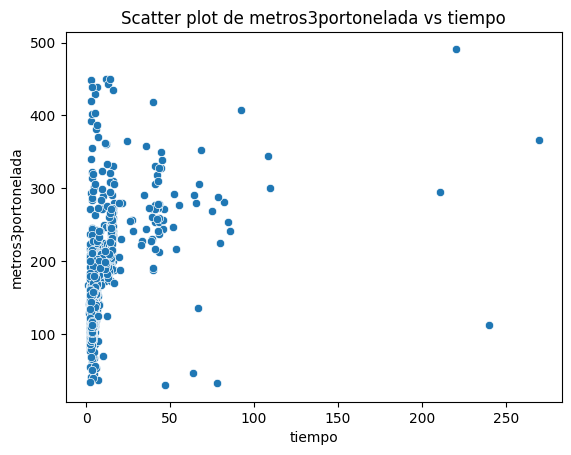

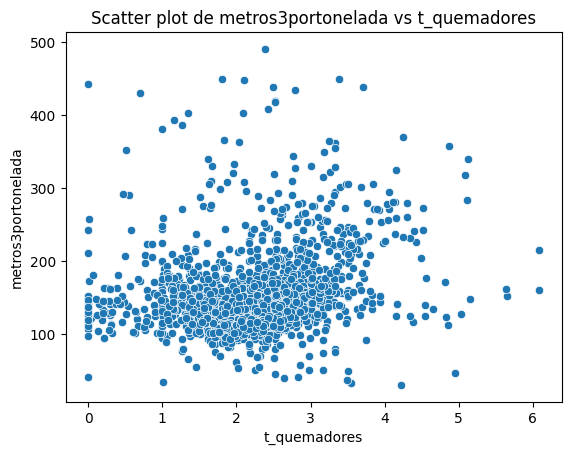

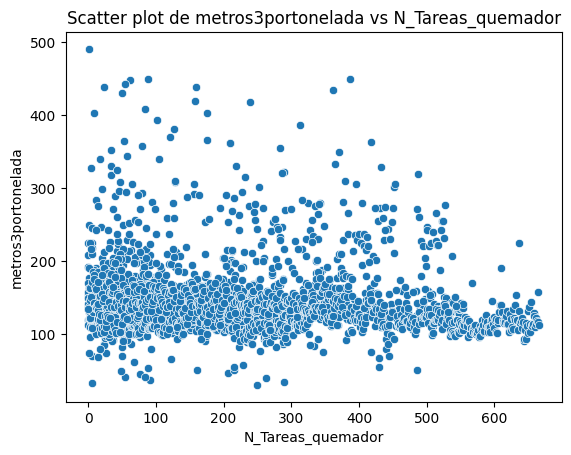

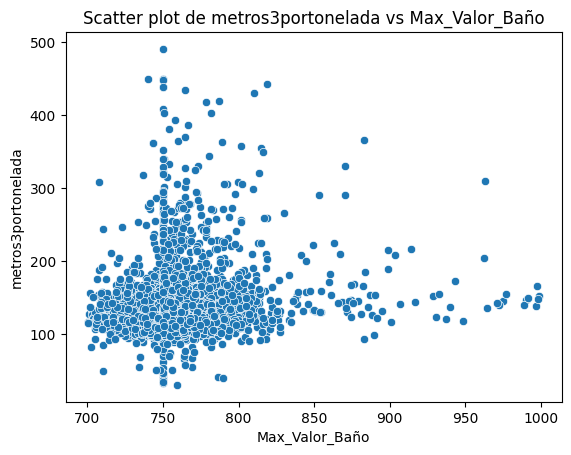

In [40]:
# Crear una visualización de scatter plot para cada variable numérica
for variable in variables_num:
    plt.figure()
    sns.scatterplot(data=data, x=variable, y='metros3portonelada')
    plt.title('Scatter plot de metros3portonelada vs ' + variable)
    plt.show()

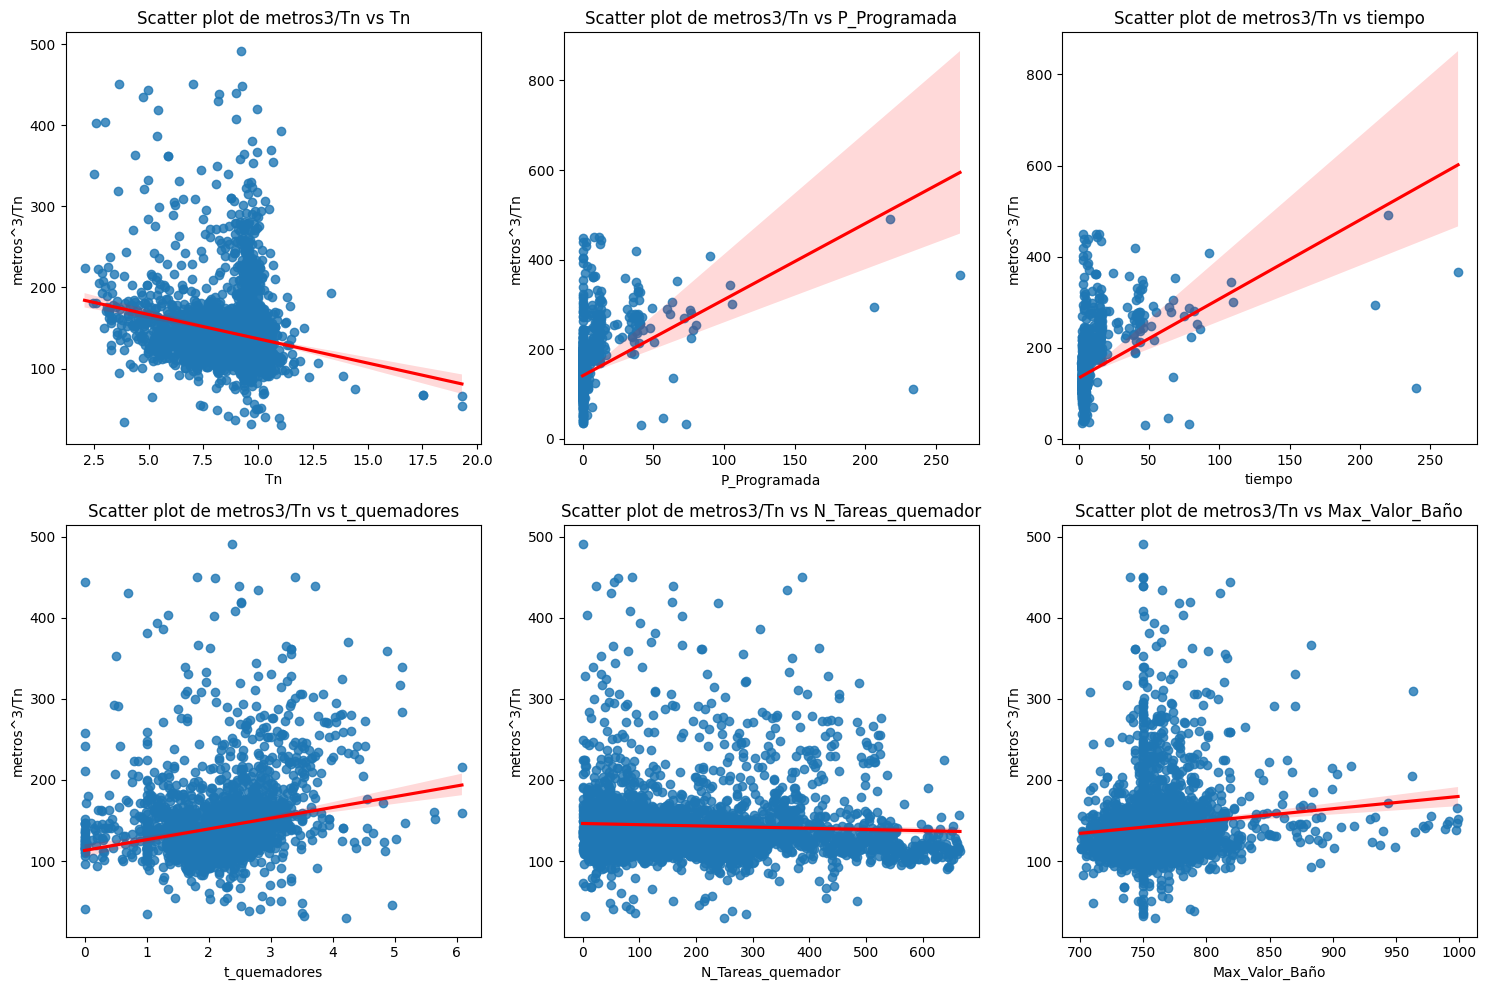

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una visualización de scatter plot con línea de tendencia en otro color para cada variable numérica
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas

# Aplanar el array de subplots para facilitar el acceso
axes = axes.flatten()

for i, variable in enumerate(variables_num):
    sns.regplot(data=data, x=variable, y='metros3portonelada', line_kws={'color': 'red'}, ax=axes[i])
    axes[i].set_title('Scatter plot de metros3/Tn vs ' + variable )
    axes[i].set_ylabel('metros^3/Tn')

plt.tight_layout()
plt.show()

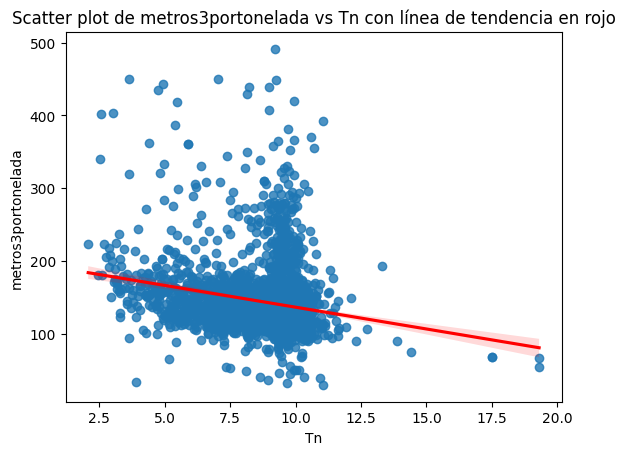

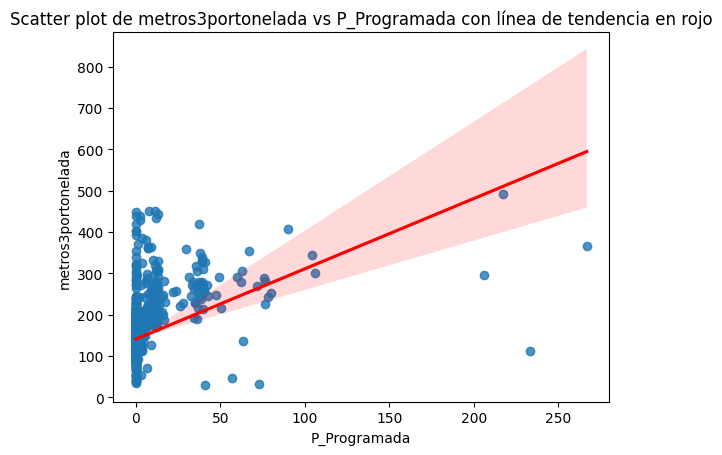

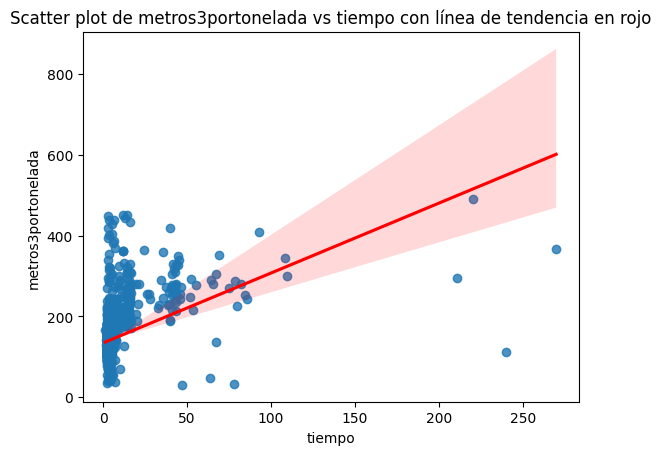

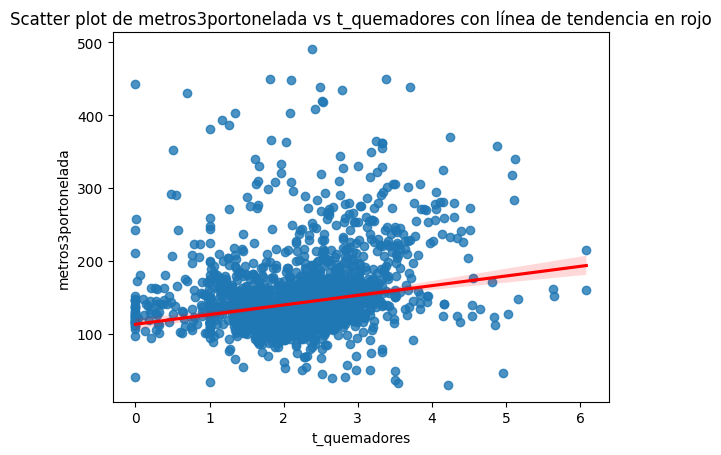

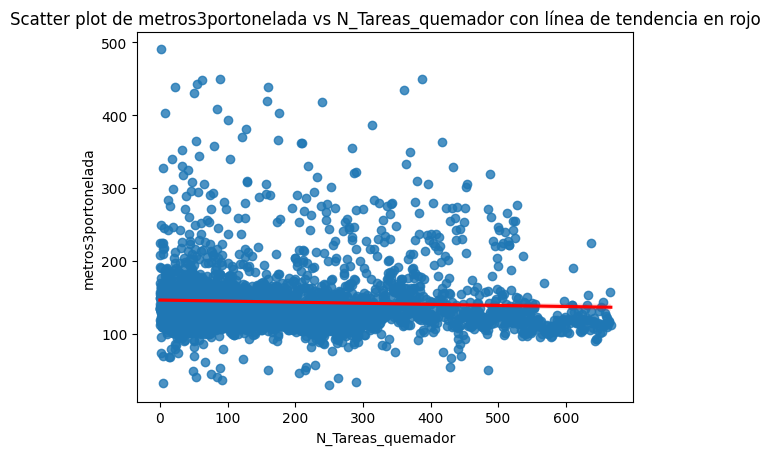

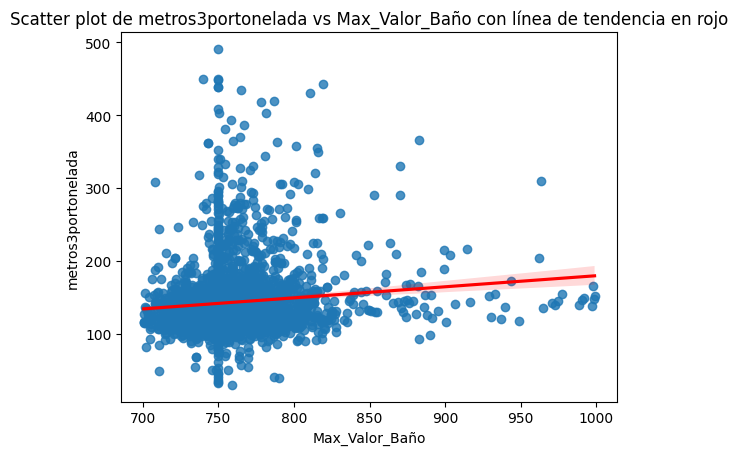

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una visualización de scatter plot con línea de tendencia en otro color para cada variable numérica
for variable in variables_num:
    plt.figure()
    sns.regplot(data=data, x=variable, y='metros3portonelada', line_kws={'color': 'red'})
    plt.title('Scatter plot de metros3portonelada vs ' + variable + ' con línea de tendencia en rojo')
    plt.show()


In [43]:
correlacion_n = [ 'metros3portonelada',"Tn", "N_lingote", "N_aleantes",
                   "N_RG", "N_RI", "N_RF", "Total", "P_Prog_6X", "P_Programada", "P_manteniento", "P_proceso",
                   "P_productiva", "tiempo", "t_quemadores", "tiempo_neto", "Tiempo_productivo",
                   'N_Tareas_Fumisteria', 'N_Tareas_Reparacion_puerta', 'N_Tareas_Reparacion_Chimenea', 'N_Tareas_Intervencion_brocal', 'N_Tareas_quemador',
                 "Max_Valor_Baño", "Max_Valor_boveda" ]

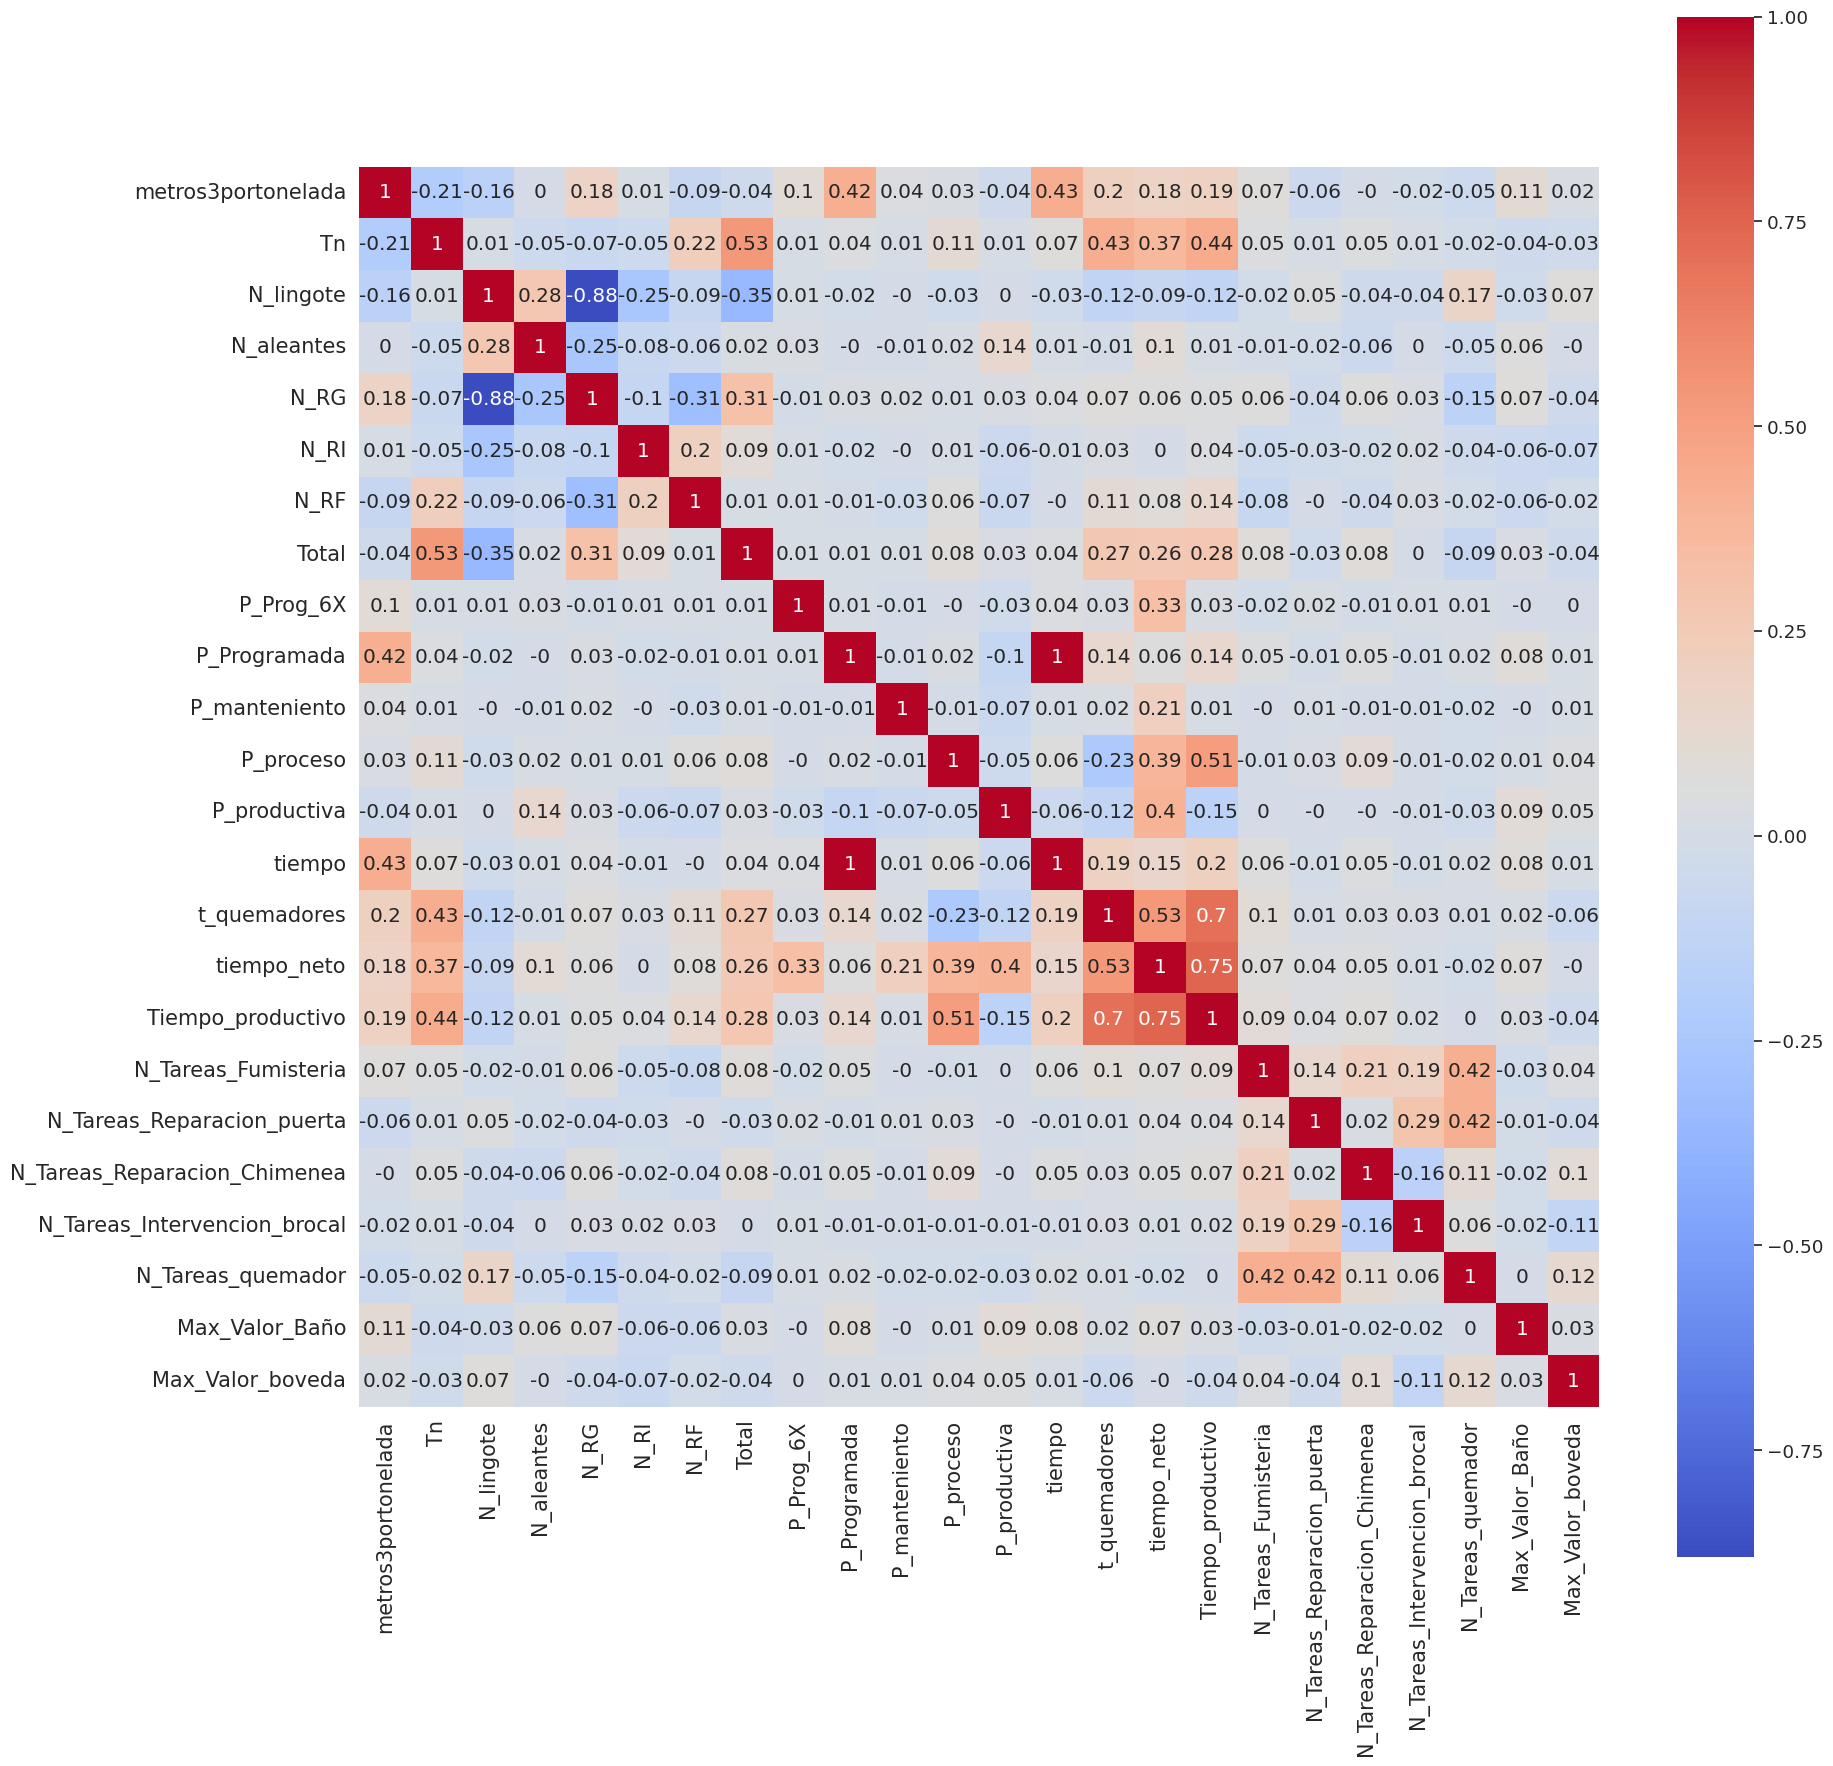

In [44]:
import pandas as pd

# Crear una matriz de correlación entre las variables de la lista
correlation_matrix = data[correlacion_n].corr()
correlation_matrix = correlation_matrix.round(2)

sns.set(font_scale=1.2)
# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 20))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Ajustar el tamaño de los ejes
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

# Mostrar el mapa de calor
plt.show()

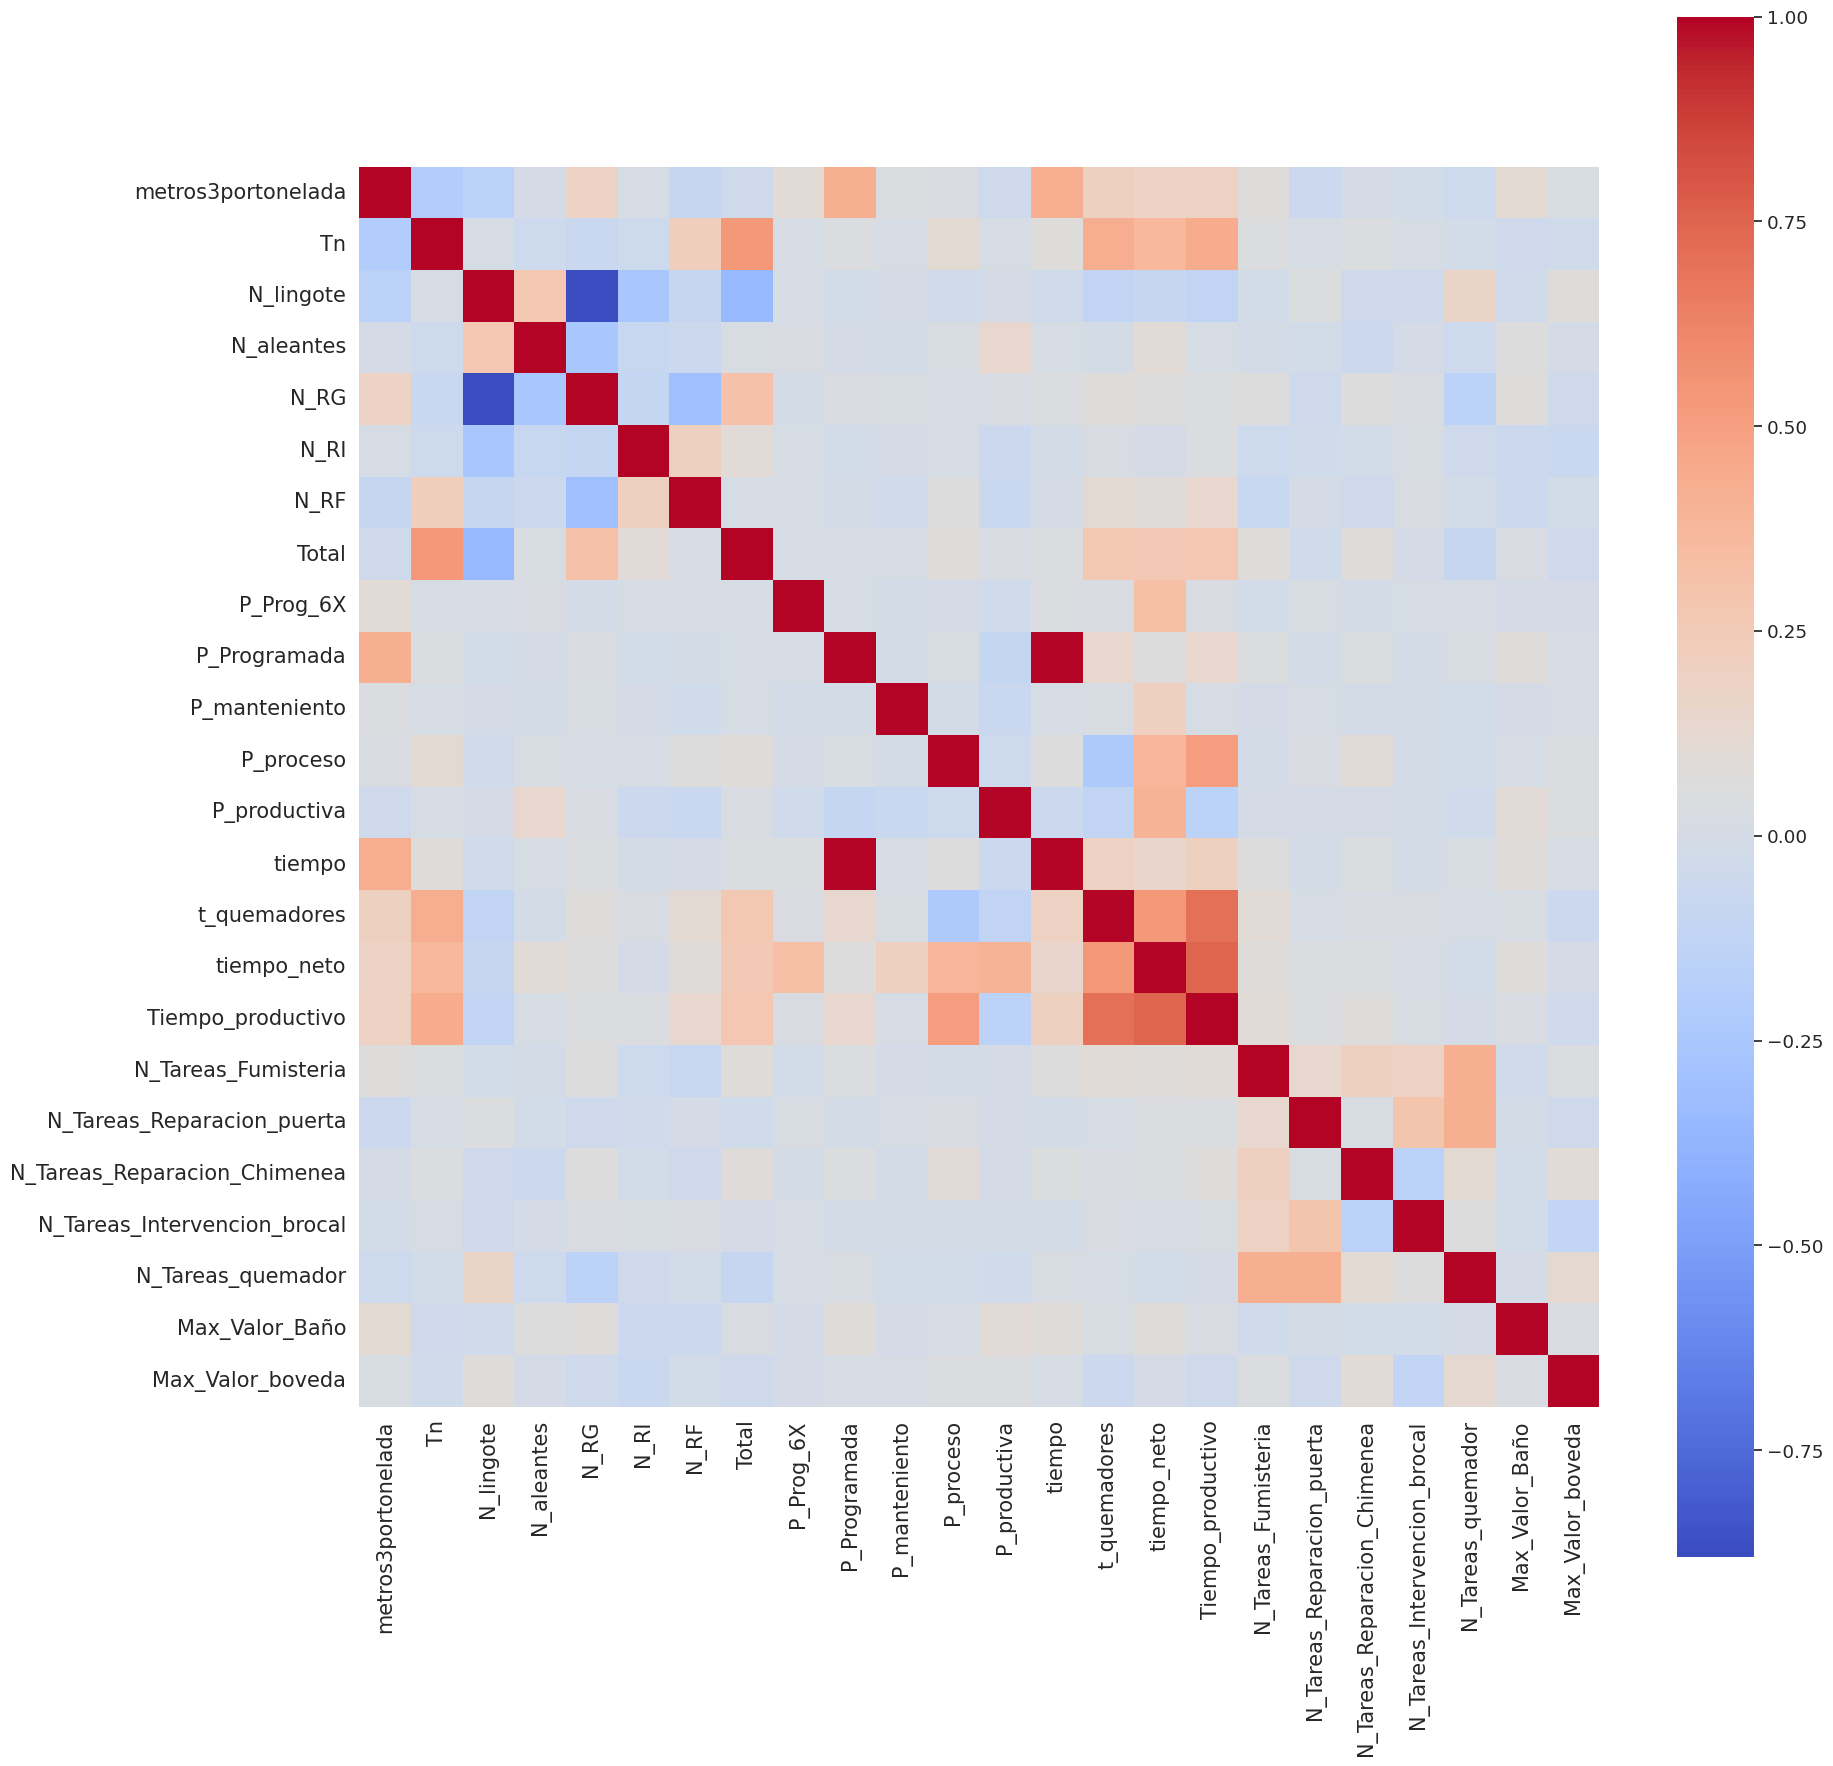

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de correlación entre las variables de la lista
correlation_matrix = data[correlacion_n].corr()
correlation_matrix = correlation_matrix.round(2)

sns.set(font_scale=1.2)
# Crear el mapa de calor de la matriz de correlación sin mostrar los valores
plt.figure(figsize=(20, 20))  # Tamaño de la figura
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)

# Ajustar el tamaño de los ejes
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

# Mostrar el mapa de calor
plt.show()


In [45]:
correlacion_c = ['metros3portonelada', "Turno", "cambio_turno",'operarios','Aleacion',"Cantidad",'mes','dia_semana', "Cant_Tachos", "Cant_Tarima_Viruta", "Cant_Tarima_Perforado",
                   "Cant_Tarima_Bobina_sin_nucleo", "Cant_Tarima_Briqueta", "Madeja", "Cant_Tarima_Bolson",
                   "Cant_Tarima_Bobina_s_nucleo", "Cant_Paquete", "Cant_Externo", "Cant_Madryn", "Cant_Rollo",
                   "Cant_Saw", "Cant_Placa", "Cant_Barrote_Tocho"]


<ipython-input-46-83662aca5843>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[correlacion_c].corr()


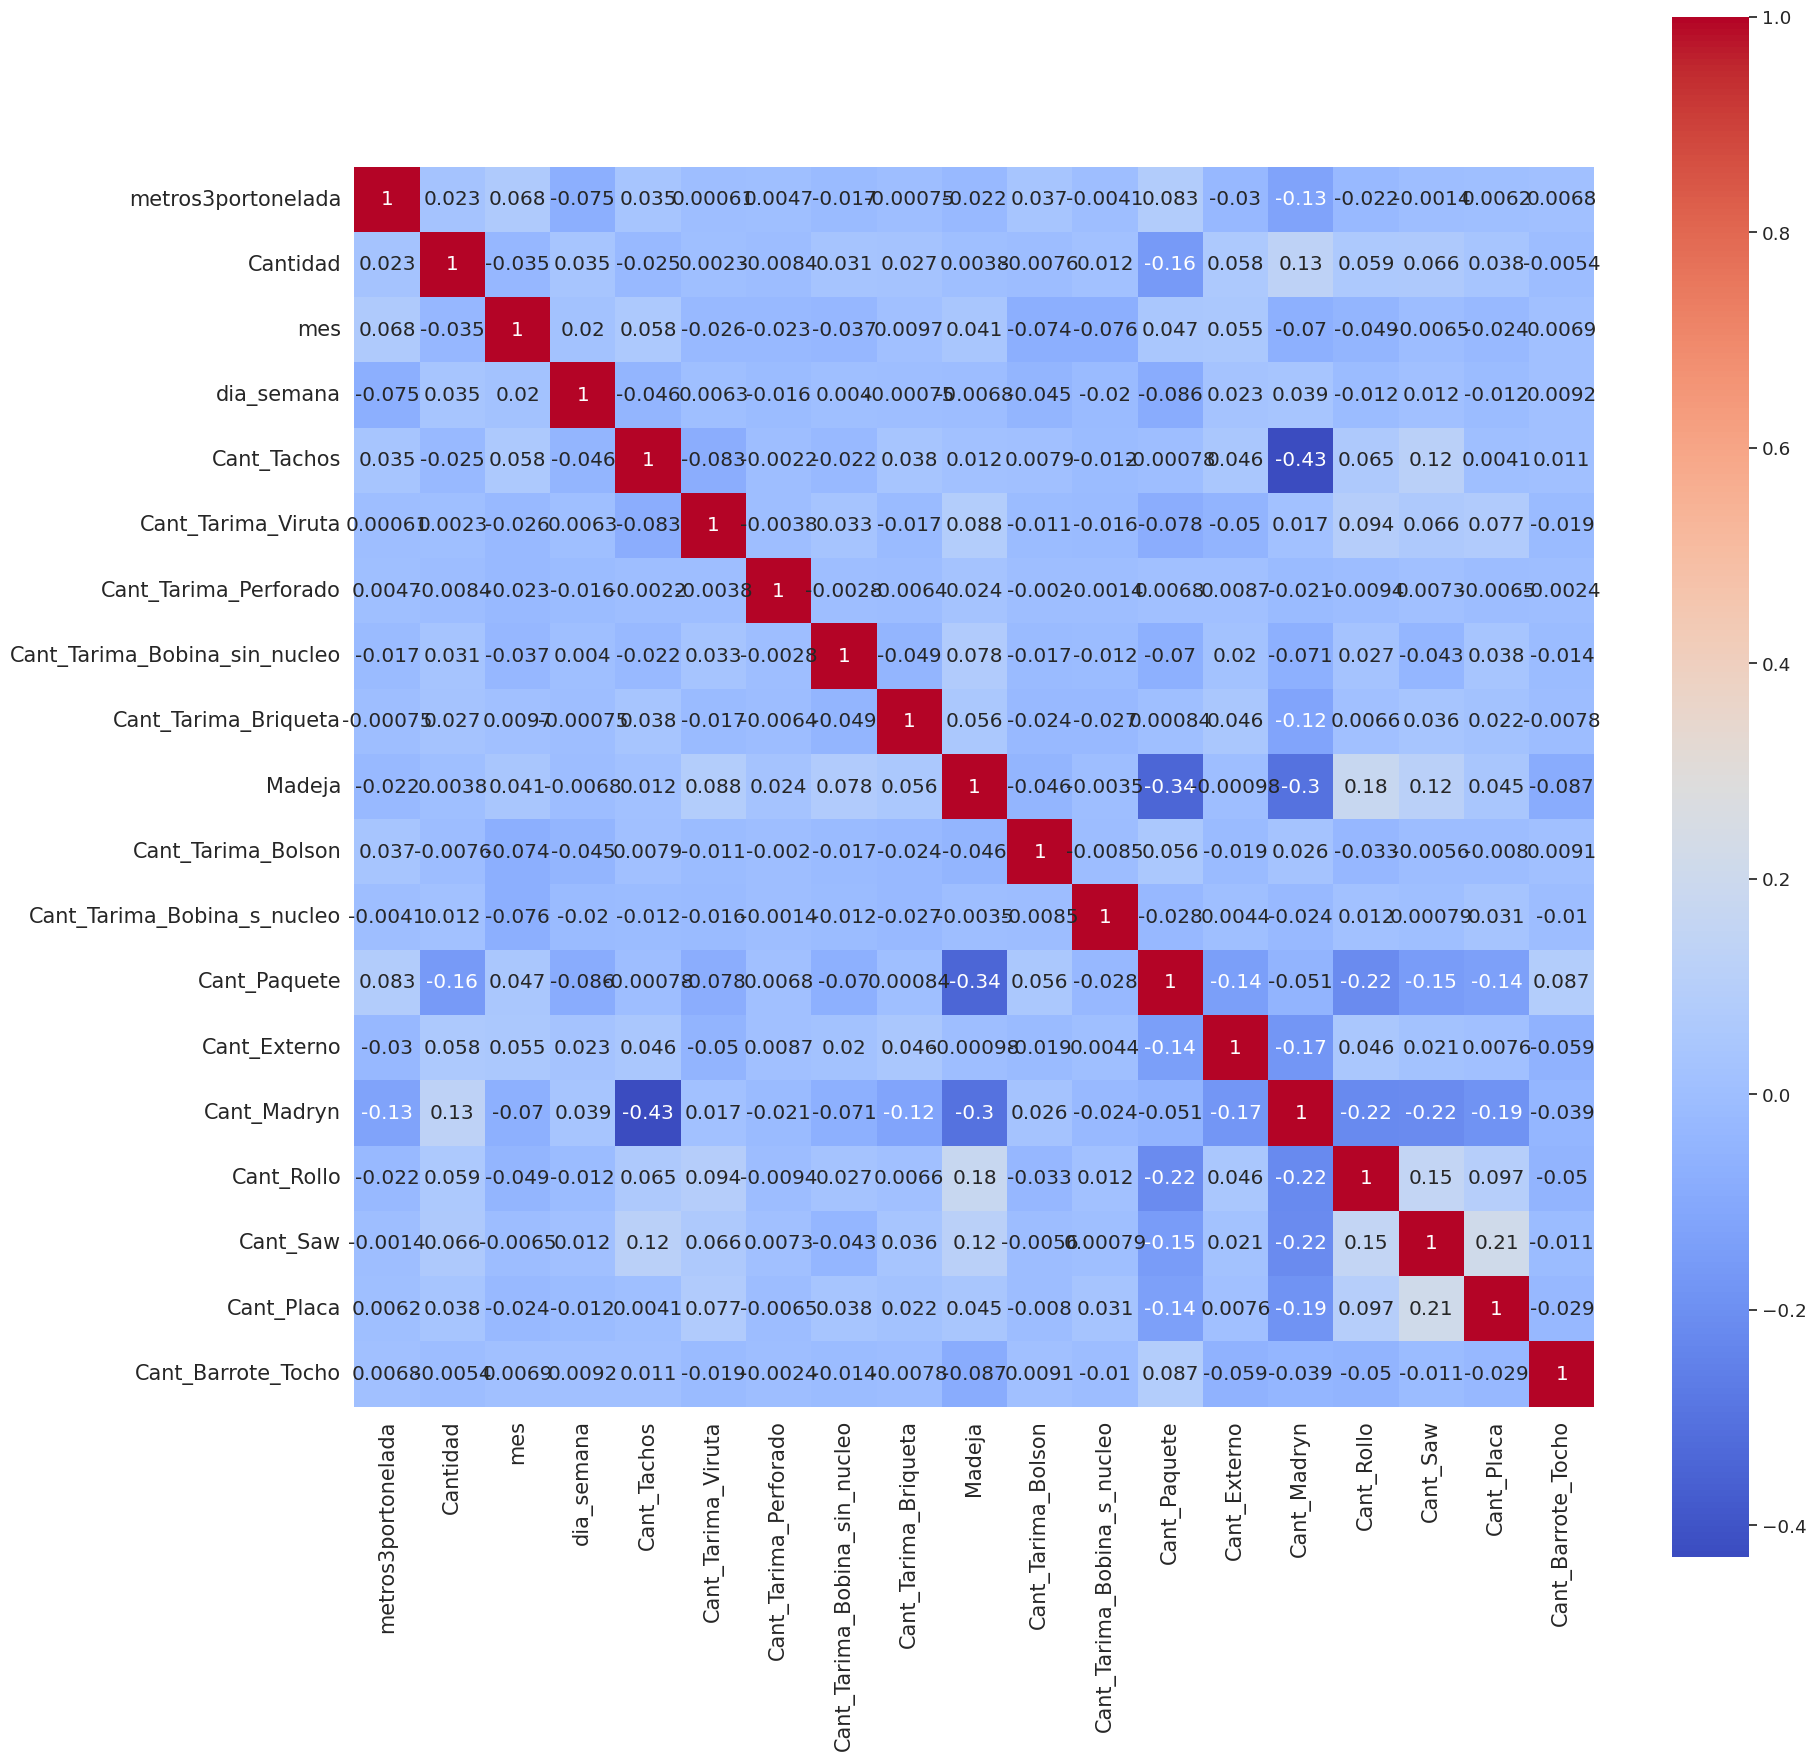

In [46]:
import pandas as pd

# Crear una matriz de correlación entre las variables de la lista
correlation_matrix = data[correlacion_c].corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 20))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Ajustar el tamaño de los ejes
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

# Mostrar el mapa de calor
plt.show()

# Particionar el data set

In [47]:

#data = data.dropna()

# Seleccionar las columnas deseadas
columns_to_keep = ["CC", "Aleantes", "Lingote", "RF", "RG", "RI", "Kg", "N_lingote", "N_aleantes",
                   "N_RG", "N_RI", "N_RF", "Cant_Tachos", "Cant_Tarima_Viruta", "Cant_Tarima_Perforado",
                   "Cant_Tarima_Bobina_sin_nucleo", "Cant_Tarima_Briqueta", "Madeja", "Cant_Tarima_Bolson",
                   "Cant_Tarima_Bobina_s_nucleo", "Cant_Paquete", "Cant_Externo", "Cant_Madryn", "Cant_Rollo",
                   "Cant_Saw", "Cant_Placa", "Cant_Barrote_Tocho", "Total", "Turno", "cambio_turno",
                   "Max_Valor_Baño", "Max_Valor_boveda", "P_Prog_6X", "P_Programada", "P_manteniento", "P_proceso",
                   "P_productiva", "tiempo", "t_quemadores", "tiempo_neto", "Tiempo_productivo", "Cantidad", 'mes','dia_semana','dia_mes','semana',
                   'operarios','Aleacion','N_Tareas_Fumisteria', 'N_Tareas_Reparacion_puerta', 'N_Tareas_Reparacion_Chimenea', 'N_Tareas_Intervencion_brocal', 'N_Tareas_quemador' ]

X = data[columns_to_keep]
y = data['objetivo']

numeric_columns = ["RG", "N_lingote", "N_aleantes", "N_RG", "N_RI", "N_RF", "Kg"]


# Reemplazar "Si" por 1 en y_train
y.replace("Si", 1, inplace=True)

# Reemplazar "No" por 0 en y_train
y.replace("No", 0, inplace=True)


columnas_categoricas = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, columns=columnas_categoricas)


# Realizar la partición estratificada en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (2492, 162)
Forma de y_train: (2492,)
Forma de X_test: (624, 162)
Forma de y_test: (624,)


# Prueba

In [48]:
params = {
    'n_estimators': 153,  # Número de árboles
    'max_depth': 20,       # Profundidad máxima de los árboles
    'learning_rate': 0.07761346934081266, # Tasa de aprendizaje
    'subsample': 0.8196352503803254,
    'colsample_bytree': 1.0
}

modelo = xgb.XGBClassifier(**params)
model = modelo.fit(X_train, y_train)



In [49]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción del modelo
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Imprimir el AUC de la curva ROC
print("AUC de la curva ROC:", roc_auc)


AUC de la curva ROC: 0.9219065656565657


In [50]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.8509615384615384


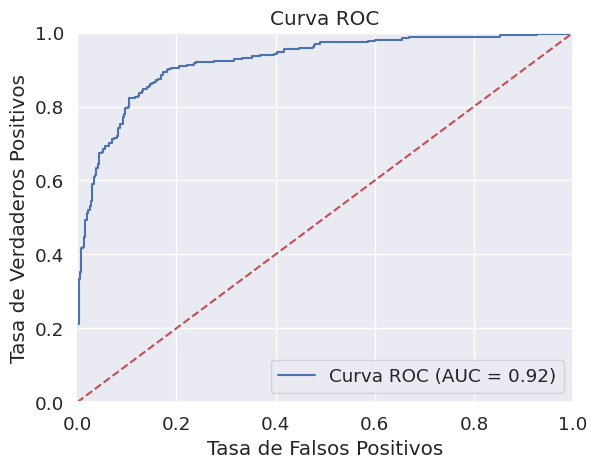

In [51]:
import matplotlib.pyplot as plt

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal para referencia
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[326  34]
 [ 59 205]]


In [53]:
importance = model.feature_importances_
feature_names = X_train.columns.tolist()
# Crear un diccionario de importancia de características
feature_importance_dict = dict(zip(feature_names, importance))

# Ordenar el diccionario por importancia en orden descendente
sorted_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
sorted_importance_dict

{'tiempo': 0.042376976,
 'Kg': 0.030979803,
 't_quemadores': 0.028740576,
 'Aleacion_6061': 0.027663844,
 'CC': 0.026003322,
 'N_Tareas_quemador': 0.022931509,
 'operarios_16597-22036': 0.020839294,
 'N_aleantes': 0.02063484,
 'Aleacion_1100': 0.020070625,
 'operarios_23432-22565': 0.019869937,
 'N_RG': 0.019260693,
 'N_Tareas_Reparacion_Chimenea': 0.018832061,
 'Aleacion_3003': 0.018716043,
 'N_Tareas_Fumisteria': 0.018073624,
 'Aleacion_8011': 0.016990699,
 'operarios_22036-16597': 0.016967941,
 'mes': 0.015935035,
 'semana': 0.015525496,
 'Max_Valor_boveda': 0.015441389,
 'operarios_22565-22563': 0.0154339075,
 'Cant_Placa': 0.015037856,
 'N_Tareas_Reparacion_puerta': 0.014779106,
 'Lingote': 0.014575474,
 'Cant_Madryn': 0.01421621,
 'P_manteniento': 0.013896004,
 'N_Tareas_Intervencion_brocal': 0.01375285,
 'Tiempo_productivo': 0.013538002,
 'Cant_Tarima_Viruta': 0.013502777,
 'Cant_Paquete': 0.013479691,
 'Max_Valor_Baño': 0.012537585,
 'Turno_N': 0.012062973,
 'tiempo_neto': 0.01

#Random Forest

In [54]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [55]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a optimizar y sus rangos
param_space = {
    'n_estimators': (10, 500),  # Rango para el número de árboles
    'max_depth': (1, 30),       # Rango para la profundidad máxima de los árboles
    'min_samples_split': (2, 30), # Rango para el número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf':(1, 20)
    }

# Crear el estimador de Random Forest
rf = RandomForestClassifier()

# Realizar la optimización bayesiana con validación cruzada
opt = BayesSearchCV(rf, param_space, n_iter=50, cv=5, scoring='roc_auc')
opt.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros: ", opt.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model_RF = opt.best_estimator_
test_score = best_model_RF.score(X_test, y_test)
print("Puntuación en el conjunto de prueba: ", test_score)


Mejores hiperparámetros:  OrderedDict([('max_depth', 27), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 322)])
Puntuación en el conjunto de prueba:  0.8060897435897436


In [56]:
print("Mejor score de train", opt.best_score_)

Mejor score de train 0.91035961852439


In [57]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción del modelo
y_pred_proba_RF = best_model_RF.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_RF)
roc_auc = auc(fpr, tpr)

# Imprimir el AUC de la curva ROC
print("AUC de la curva ROC:", roc_auc)


AUC de la curva ROC: 0.9010679713804713


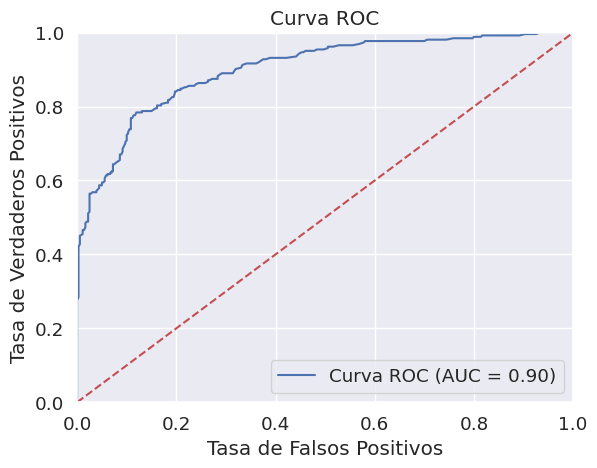

In [58]:
import matplotlib.pyplot as plt

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal para referencia
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred_RF = best_model_RF.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[332  28]
 [ 93 171]]


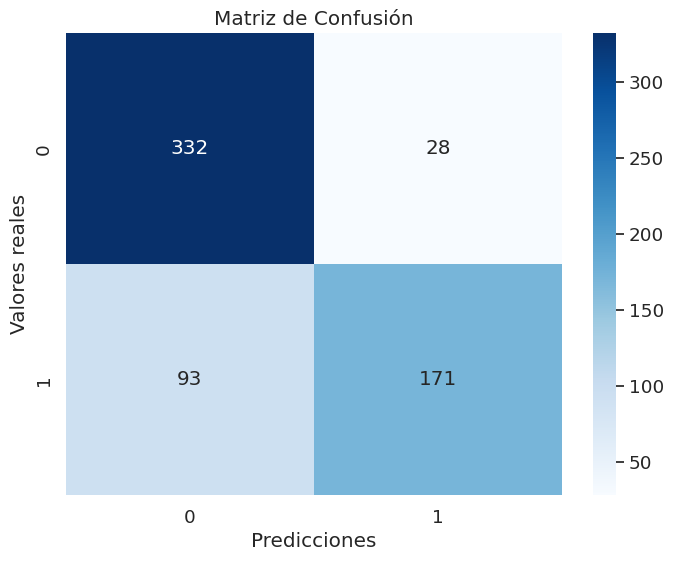

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred_RF = best_model_RF.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_RF)

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")
plt.show()

# XGBoost

In [61]:
import xgboost as xgb

In [62]:
param_space = {
    'n_estimators': (10, 500),  # Rango para el número de árboles
    'max_depth': (1, 30),       # Rango para la profundidad máxima de los árboles
    'learning_rate': (0.01, 0.1), # Rango para la tasa de aprendizaje
    'subsample': (0.1, 1.0),
    'colsample_bytree': (0.5, 1.0),
}

In [63]:
xgb_model = xgb.XGBClassifier()


In [64]:
opt = BayesSearchCV(xgb_model, param_space, n_iter=50, cv=5, scoring='roc_auc')
opt.fit(X_train, y_train)


BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None, predictor=None,
                                      random_state=None, ...),
              scoring='roc_auc',
              search_spaces={'colsample_bytree': (0.5, 1.0),
                             'learning_rate': (0.01, 0.1), 'max_depth': (1, 30),
                             'n_estimators': (10, 500),
                             'subsample': (0.1, 1.0)})

In [65]:
print("Mejores hiperparámetros: ", opt.best_params_)

Mejores hiperparámetros:  OrderedDict([('colsample_bytree', 0.5), ('learning_rate', 0.1), ('max_depth', 19), ('n_estimators', 182), ('subsample', 0.6748857052515126)])


In [66]:
best_model = opt.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Puntuación en el conjunto de prueba: ", test_score)

Puntuación en el conjunto de prueba:  0.8525641025641025


In [67]:
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred = best_model.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[327  33]
 [ 59 205]]


In [68]:
print("Mejor score de train", opt.best_score_)

Mejor score de train 0.9399205951662315


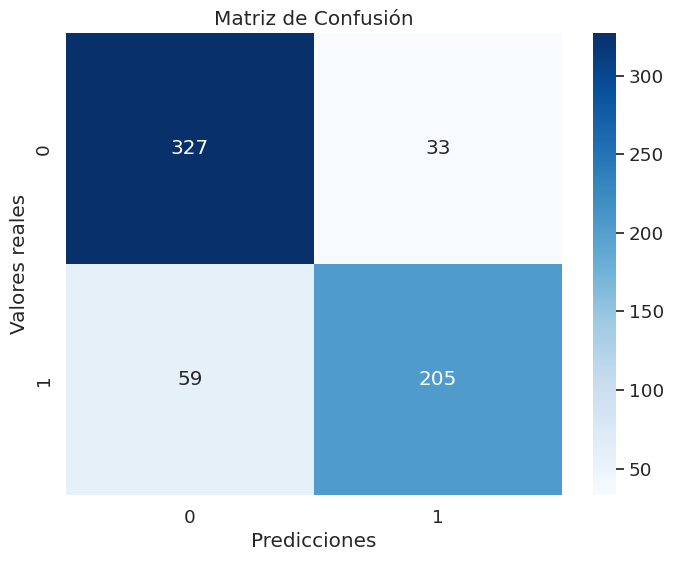

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")
plt.show()

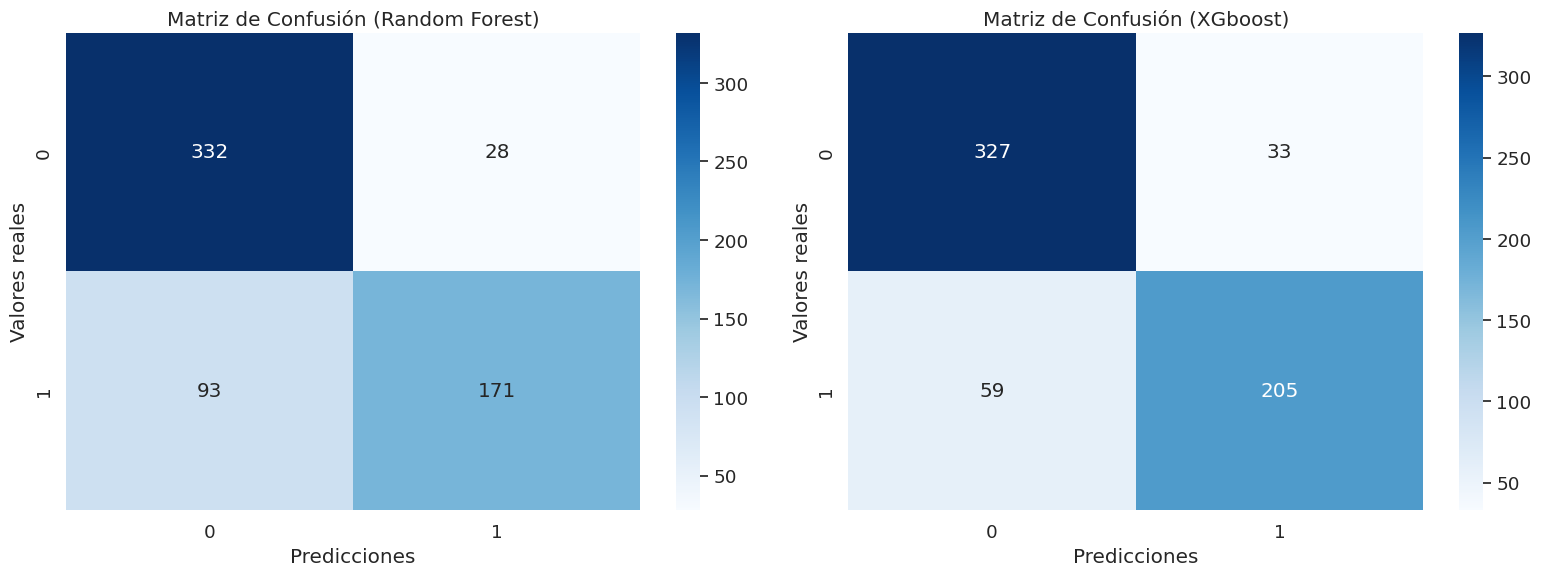

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred_RF = best_model_RF.predict(X_test)

# Calcular la matriz de confusión
confusion_1 = confusion_matrix(y_test, y_pred_RF)
confusion = confusion_matrix(y_test, y_pred)

# Crear una figura con dos subplots (1 fila y 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graficar el primer mapa de calor en el primer subplot
sns.heatmap(confusion_1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_xlabel("Predicciones")
axes[0].set_ylabel("Valores reales")
axes[0].set_title("Matriz de Confusión (Random Forest)")

# Graficar el segundo mapa de calor en el segundo subplot
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_xlabel("Predicciones")
axes[1].set_ylabel("Valores reales")
axes[1].set_title("Matriz de Confusión (XGboost)")

# Ajustar los subplots para que no haya superposición
plt.tight_layout()

# Mostrar la figura con ambos mapas de calor
plt.show()


In [70]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción del modelo
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Imprimir el AUC de la curva ROC
print("AUC de la curva ROC:", roc_auc)


AUC de la curva ROC: 0.9243792087542088


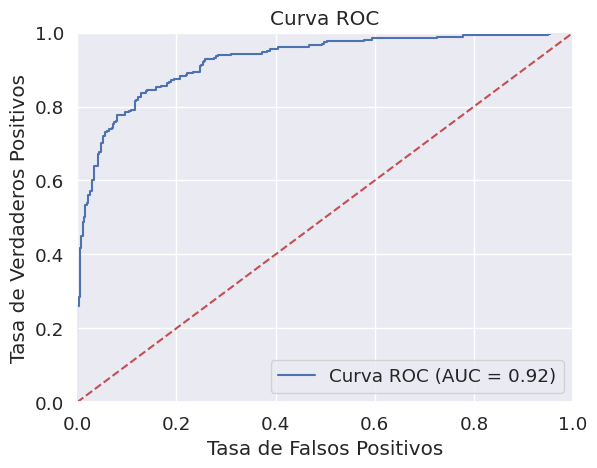

In [71]:
import matplotlib.pyplot as plt

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal para referencia
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [72]:
importance = best_model.feature_importances_

In [73]:
feature_names = X_train.columns.tolist()
# Crear un diccionario de importancia de características
feature_importance_dict = dict(zip(feature_names, importance))

# Ordenar el diccionario por importancia en orden descendente
sorted_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
sorted_importance_dict

{'P_Programada': 0.03281049,
 'P_Prog_6X': 0.03023886,
 'tiempo': 0.025580926,
 't_quemadores': 0.02422786,
 'operarios_21973-16597': 0.023983,
 'Kg': 0.023662081,
 'operarios_22565-22563': 0.022020252,
 'CC': 0.02195353,
 'Aleacion_3003': 0.021422138,
 'Cant_Tarima_Viruta': 0.018584158,
 'operarios_22036-16597': 0.018418746,
 'tiempo_neto': 0.017414294,
 'mes': 0.017029958,
 'operarios_22565-16597': 0.016870527,
 'N_Tareas_Reparacion_puerta': 0.015931927,
 'operarios_16597': 0.015893385,
 'N_Tareas_Intervencion_brocal': 0.015667005,
 'operarios_22563-23432': 0.015654672,
 'operarios_21973': 0.015604229,
 'N_Tareas_quemador': 0.015318576,
 'Aleacion_1050': 0.015224485,
 'Lingote': 0.015081142,
 'semana': 0.0147992745,
 'operarios_22563': 0.0146496855,
 'Aleacion_6061': 0.014640865,
 'N_Tareas_Reparacion_Chimenea': 0.014583706,
 'operarios_23432-16597': 0.01431702,
 'operarios_16597-16597': 0.014190954,
 'operarios_22565': 0.0138153285,
 'Aleacion_1100': 0.0136971995,
 'Cant_Paquete': 0

In [74]:
sorted_importance_dict

{'P_Programada': 0.03281049,
 'P_Prog_6X': 0.03023886,
 'tiempo': 0.025580926,
 't_quemadores': 0.02422786,
 'operarios_21973-16597': 0.023983,
 'Kg': 0.023662081,
 'operarios_22565-22563': 0.022020252,
 'CC': 0.02195353,
 'Aleacion_3003': 0.021422138,
 'Cant_Tarima_Viruta': 0.018584158,
 'operarios_22036-16597': 0.018418746,
 'tiempo_neto': 0.017414294,
 'mes': 0.017029958,
 'operarios_22565-16597': 0.016870527,
 'N_Tareas_Reparacion_puerta': 0.015931927,
 'operarios_16597': 0.015893385,
 'N_Tareas_Intervencion_brocal': 0.015667005,
 'operarios_22563-23432': 0.015654672,
 'operarios_21973': 0.015604229,
 'N_Tareas_quemador': 0.015318576,
 'Aleacion_1050': 0.015224485,
 'Lingote': 0.015081142,
 'semana': 0.0147992745,
 'operarios_22563': 0.0146496855,
 'Aleacion_6061': 0.014640865,
 'N_Tareas_Reparacion_Chimenea': 0.014583706,
 'operarios_23432-16597': 0.01431702,
 'operarios_16597-16597': 0.014190954,
 'operarios_22565': 0.0138153285,
 'Aleacion_1100': 0.0136971995,
 'Cant_Paquete': 0

In [75]:
filtered_X_train = data[data["Turno"] == 'T-T-N']

In [76]:
 ["CC", "Aleantes", "Lingote", "RF", "RG", "RI", "Kg", "N_lingote", "N_aleantes",
                   "N_RG", "N_RI", "N_RF", "Cant_Tachos", "Cant_Tarima_Viruta", "Cant_Tarima_Perforado",
                   "Cant_Tarima_Bobina_sin_nucleo", "Cant_Tarima_Briqueta", "Madeja", "Cant_Tarima_Bolson",
                   "Cant_Tarima_Bobina_s_nucleo", "Cant_Paquete", "Cant_Externo", "Cant_Madryn", "Cant_Rollo",
                   "Cant_Saw", "Cant_Placa", "Cant_Barrote_Tocho", "Total", "operarios", "Turno", "cambio_turno",
                   "Max_Valor_Baño", "Max_Valor_boveda", "P_Prog_6X", "P_Programada", "P_manteniento", "P_proceso",
                   "P_productiva", "tiempo", "t_quemadores", "tiempo_neto", "Tiempo_productivo", "Cantidad","Aleacion"]

['CC',
 'Aleantes',
 'Lingote',
 'RF',
 'RG',
 'RI',
 'Kg',
 'N_lingote',
 'N_aleantes',
 'N_RG',
 'N_RI',
 'N_RF',
 'Cant_Tachos',
 'Cant_Tarima_Viruta',
 'Cant_Tarima_Perforado',
 'Cant_Tarima_Bobina_sin_nucleo',
 'Cant_Tarima_Briqueta',
 'Madeja',
 'Cant_Tarima_Bolson',
 'Cant_Tarima_Bobina_s_nucleo',
 'Cant_Paquete',
 'Cant_Externo',
 'Cant_Madryn',
 'Cant_Rollo',
 'Cant_Saw',
 'Cant_Placa',
 'Cant_Barrote_Tocho',
 'Total',
 'operarios',
 'Turno',
 'cambio_turno',
 'Max_Valor_Baño',
 'Max_Valor_boveda',
 'P_Prog_6X',
 'P_Programada',
 'P_manteniento',
 'P_proceso',
 'P_productiva',
 'tiempo',
 't_quemadores',
 'tiempo_neto',
 'Tiempo_productivo',
 'Cantidad',
 'Aleacion']

# iBreakdown

In [77]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046000 sha256=0cb2e8d4658119bad5074a7af54b4dcce91a5119894a563e67537ef3ec291157
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [78]:
import dalex as dx

In [79]:
X_train

CC  Aleantes  Lingote    RF      RG    RI      Kg  N_lingote  \
1374  2011        43     4085     0  5504.0     0  9632.0       0.42   
1448  2021        38     5465   909  2618.0   895  9925.0       0.55   
1064  2021         0     2065     0  7301.0   571  9937.0       0.21   
92    2021        12     6697  1261  1047.0     0  9017.0       0.74   
880   2011         3     8066   856   635.0     0  9560.0       0.84   
...    ...       ...      ...   ...     ...   ...     ...        ...   
583   2011        47      482     0  7867.0  1348  9744.0       0.05   
1321  2011        32     3259     0  5928.0     0  9219.0       0.35   
86    2021        68     7128  1698     0.0     0  8894.0       0.80   
58    2011       301     9324     0     0.0     0  9625.0       0.97   
1045  2021        23      513   292  2768.0  1176  4772.0       0.11   

      N_aleantes  N_RG  ...  Aleacion_6063  Aleacion_6082  Aleacion_6101  \
1374        0.00  0.57  ...              1              0              0   
1448        0.00  0.26  ...              0              0              0   
1064        0.00  0.73  ...              0              0              0   
92          0.00  0.12  ...              0              0              0   
880         0.00  0.07  ...              0              0              0   
...          ...   ...  ...            ...            ...            ...   
583         0.00  0.81  ...              0              0              0   
1321        0.00  0.64  ...              1              0              0   
86          0.01  0.00  ...              0              0              0   
58          0.03  0.00  ...              0              0              0   
1045        0.00  0.58  ...              0              0              0   

      Aleacion_8006  Aleacion_8011  Aleacion_8011P  Aleacion_8079  \
1374              0              0               0              0   
1448              0              0               0              1   
1064              0              0               0              0   
92                0              0               0              0   
880               0              0               0              0   
...             ...            ...             ...            ...   
583               0              0               1              0   
1321              0              0               0              0   
86                0              0               0              1   
58                1              0               0              0   
1045              0              0               1              0   

      Aleacion_8079K  Aleacion_8112  Aleacion_K1075  
1374               0              0               0  
1448               0              0               0  
1064               0              0               0  
92                 0              0               0  
880                0              0               0  
...              ...            ...             ...  
583                0              0               0  
1321               0              0               0  
86                 0              0               0  
58                 0              0               0  
1045               0              0               0  

[2492 rows x 162 columns]

In [80]:
X_train.set_index(pd.Index(range(len(X_train))), inplace=True)

In [81]:
X_test.set_index(pd.Index(range(len(X_test))), inplace=True)

In [82]:
explainer = dx.Explainer(best_model, X_train, y_train)


Preparation of a new explainer is initiated

  -> data              : 2492 rows 162 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2492 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ac24ee54940> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000183, mean = 0.422, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.245, mean = 0.000275, max = 0.375
  -> model_info        : package xgboost

A new explainer has been created!


In [83]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[0]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)


In [84]:
resultados.plot()

In [85]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[25]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

In [86]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[50]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

In [87]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[200]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

In [88]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[250]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

In [89]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[300]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

In [90]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[400]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

In [91]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[500]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

In [92]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[550]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

In [93]:
# Seleccionar una observación específica para realizar la descomposición individual
observacion = X_test.iloc[600]

# Aplicar el método ibreakdown
resultados = explainer.predict_parts(observacion)

resultados.plot()

# Grafico de consumo de gas

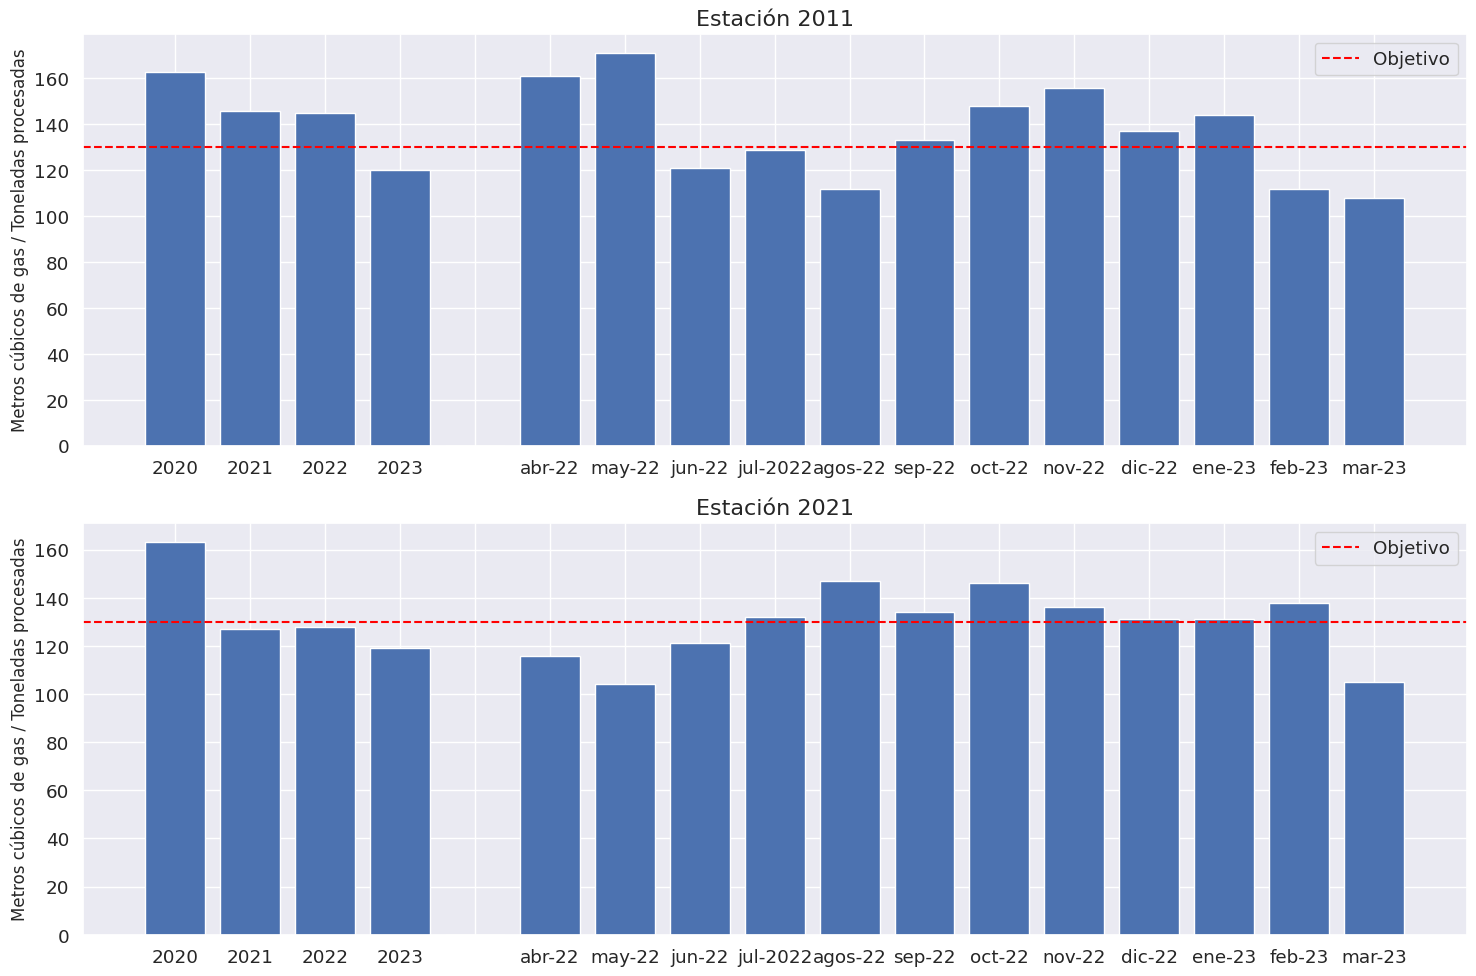

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para CC:2011
cc_2011 = [163, 146, 145, 120, 0, 161, 171, 121, 129, 112, 133, 148, 156, 137, 144, 112, 108]
tiempo = ['2020', '2021', '2022', '2023', '', 'abr-22', 'may-22', 'jun-22', 'jul-2022', 'agos-22', 'sep-22', 'oct-22', 'nov-22', 'dic-22', 'ene-23', 'feb-23', 'mar-23']

# Datos para CC:2021
cc_2021 = [163, 127, 128, 119, 0, 116, 104, 121, 132, 147, 134, 146, 136, 131, 131, 138, 105]

# Eliminar valores nulos
cc_2011 = [val if val is not None else np.nan for val in cc_2011]
cc_2021 = [val if val is not None else np.nan for val in cc_2021]

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Gráfico para CC:2011
ax1.bar(tiempo, cc_2011)
ax1.set_title('Estación 2011', fontsize=16)

ax1.set_ylabel('Metros cúbicos de gas / Toneladas procesadas', fontsize=12)

# Agregar la línea punteada y la leyenda en CC:2011
ax1.axhline(y=130, linestyle='--', color='red', label='Objetivo')
ax1.legend()

# Gráfico para CC:2021
ax2.bar(tiempo, cc_2021)
ax2.set_title('Estación 2021', fontsize=16)

ax2.set_ylabel('Metros cúbicos de gas / Toneladas procesadas', fontsize=12)

# Agregar la línea punteada y la leyenda en CC:2021
ax2.axhline(y=130, linestyle='--', color='red', label='Objetivo')
ax2.legend()

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
